In [1]:
# QUESTION 2 - OIL WELL PRODUCTION DATA ANALYSIS

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import numpy as np
import pandas as pd

In [3]:
# Load the Wells Production Data from Excel
file_path = "oilwell_production_data.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Create a dataframe for each worksheet in the excel
daily_production_df = sheets_dict["Daily Production Data"]
well_F1C_data = sheets_dict["Daily Production_F-1C"]
well_F11_data = sheets_dict["Daily Production_F-11"]
well_F12_data = sheets_dict["Daily Production_F-12"]
well_F14_data = sheets_dict["Daily Production_F-14"]
well_F15D_data = sheets_dict["Daily Production_F-15D"]
well_F4_data = sheets_dict["Daily Production_F-4"]
well_F5_data = sheets_dict["Daily Production_F-5"]

In [4]:
# -- DATA INSPECTION

In [5]:
# Create a list for all well dataframes
list_of_wells = [
    well_F1C_data,
    well_F11_data,
    well_F12_data,
    well_F14_data,
    well_F15D_data,
    well_F4_data,
    well_F5_data,
]

# Inspect a sample well data to preview data
def inspect_well_data(well_name, df):
    print(f"\n == WELL {well_name} Info:")
    print("\n == Columns and Data Types:")
    print(df.dtypes)
    print(f"\n == WELL {well_name} Dataframe Preview:\n")
    display(df.head())

inspect_well_data(well_name='15/9-F-12', df=well_F12_data)


 == WELL 15/9-F-12 Info:

 == Columns and Data Types:
DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
GOR                                float64
BORE_WAT_VOL                       float64

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2008-02-12  NO 15/9-F-12 H                5599          15/9-F-12   
1 2008-02-13  NO 15/9-F-12 H                5599          15/9-F-12   
2 2008-02-14  NO 15/9-F-12 H                5599          15/9-F-12   
3 2008-02-15  NO 15/9-F-12 H                5599          15/9-F-12   
4 2008-02-16  NO 15/9-F-12 H                5599          15/9-F-12   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_WHT_P  DP_CHOKE_SIZE  \
0          11.50             308.055940  ...  16.294718      92.475107   
1          24.00             303.033518  ...  53.374330      89.620148   
2          22.50             295.586061  ...  72.737631      80.120465   
3          23.15             297.662702  ...  69.995943      84.250990   
4          24.00             295.935519  ...  71.518347      82.359026   

   BORE_OIL_VOL  BORE_GAS_VOL         GOR  BORE_WAT_VOL       WOR  \
0        284.65      38888.67  136.619252        385.01  1.352573   
1       1869.70     285246.16  152.562529          7.13  0.003813   
2       3124.09     509954.88  163.233095          1.16  0.000371   
3       2608.28     383426.67  147.003646          0.97  0.000372   
4       3051.80     418474.00  137.123665          4.89  0.001602   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         OP  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 26 columns]

In [6]:
# -- DATA CLEANING

In [7]:
# Create a function for cleaning well datasets
def clean_well_data(df):
    # Convert 'DATEPRD' to datetime
    df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], errors="coerce")

    # Clean columns
    df.columns = df.columns.str.strip()
    df.rename(columns={"NPD_WELL_BORE_NAME": "WELL_NAME"}, inplace=True)
    df.drop(
        columns=[
            "WELL_BORE_CODE",
            "NPD_WELL_BORE_CODE",
            "NPD_FACILITY_CODE",
            "NPD_FIELD_CODE",
            "NPD_FACILITY_NAME",
            "NPD_FIELD_NAME",
        ],
        inplace=True,
    )

    return df

# Clean all well dataframes
for well in list_of_wells:
    well_clean = clean_well_data(well)

In [8]:
# Inspect Cleaned Data with a sample well

print('\n== Well 15/9-F-14 Info:\n')
print(well_F14_data.info())
display(well_F14_data.head())


== Well 15/9-F-14 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2723 non-null   datetime64[ns]
 1   WELL_NAME                 2723 non-null   object        
 2   ON_STREAM_HRS             2723 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     2717 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  2717 non-null   float64       
 5   AVG_DP_TUBING             2717 non-null   float64       
 6   AVG_ANNULUS_PRESS         2224 non-null   float64       
 7   AVG_CHOKE_SIZE_P          2723 non-null   float64       
 8   AVG_CHOKE_UOM             2723 non-null   object        
 9   AVG_WHP_P                 2723 non-null   float64       
 10  AVG_WHT_P                 2723 non-null   float64       
 11  DP_CHOKE_SIZE             2723 non-null   float64       

DATEPRD  WELL_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0 2008-07-13  15/9-F-14          24.00             260.866875   
1 2008-07-14  15/9-F-14           5.57             256.248230   
2 2008-07-15  15/9-F-14          24.00             254.982785   
3 2008-07-16  15/9-F-14          24.00             251.475921   
4 2008-07-17  15/9-F-14          24.00             249.346191   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                103.292880     160.151955                0.0   
1                104.017718     156.649912                0.0   
2                103.967009     156.332844                0.0   
3                104.210557     155.817187                0.0   
4                104.339184     155.760939                0.0   

   AVG_CHOKE_SIZE_P AVG_CHOKE_UOM   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0         21.052993             %  100.714919  52.381899      69.539413   
1         27.223459             %   99.598318  71.115352      68.016167   
2         27.277954             %   98.649941  67.590753      66.948884   
3         30.650552             %   95.658734  73.782251      63.663812   
4         32.562537             %   93.585252  78.035440      61.337700   

   BORE_OIL_VOL  BORE_GAS_VOL         GOR  BORE_WAT_VOL       WOR  \
0       1735.26     252235.23  145.358753          4.00  0.002305   
1        592.36      88949.00  150.160375          1.37  0.002313   
2       2532.21     373786.28  147.612670          5.84  0.002306   
3       3030.71     447840.09  147.767385          9.13  0.003012   
4       3288.08     474614.43  144.343942          7.58  0.002305   

   BORE_WI_VOL   FLOW_KIND WELL_TYPE  
0          NaN  production        OP  
1          NaN  production        OP  
2          NaN  production        OP  
3          NaN  production        OP  
4          NaN  production        OP

In [9]:
# --- DATA VISUALIZATIONS

In [10]:
# 1 -- CUMULATIVE OIL, GAS, AND WATER PRODUCTION FROM FIELD

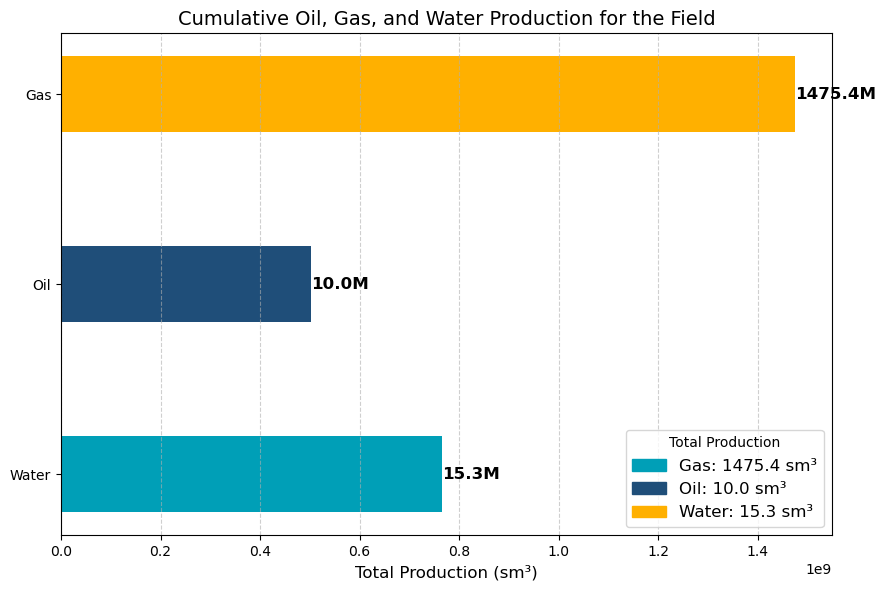

In [11]:
# Get cumulative field-wide production for oil, gas, and water
total_oil = daily_production_df["BORE_OIL_VOL"].sum()
total_gas = daily_production_df["BORE_GAS_VOL"].sum()
total_water = daily_production_df["BORE_WAT_VOL"].sum()

# Apply scaling for better visibility
oil_scale = 50
water_scale = 50
scaled_oil = total_oil * oil_scale
scaled_water = total_water * water_scale

# Data and Labels
colors = {
    "oil": "#1f4e79",
    "gas": "#ffb000",
    "water": "#009fb7"
}
categories = ["Gas", "Oil", "Water"]
values = [total_gas, scaled_oil, scaled_water] 
bar_colors = [colors["gas"], colors["oil"], colors["water"]]

def format_number(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.0f}K"
    return str(value)

# Reverse order to ensure correct placement
categories.reverse()
values.reverse()
bar_colors.reverse()

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.barh(categories, values, color=bar_colors, height=0.4)

for bar, raw_value, category in zip(bars, [total_water, total_oil, total_gas], categories):
    ax.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2,
        f"{format_number(raw_value)}",  # Display unscaled values
        ha="left", va="center", fontsize=12, fontweight="bold"
    )

ax.set_xlabel("Total Production (sm³)", fontsize=12)
ax.set_title("Cumulative Oil, Gas, and Water Production for the Field", fontsize=14)
ax.grid(axis="x", linestyle="--", alpha=0.6)
legend_labels = [
    f"Gas: {format_number(total_gas)[:-1]} sm³",
    f"Oil: {format_number(total_oil)[:-1]} sm³",
    f"Water: {format_number(total_water)[:-1]} sm³"
]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=bar_colors[i]) for i in range(3)]
ax.legend(legend_handles, legend_labels, loc="lower right", fontsize=12, title="Total Production")

plt.tight_layout()
plt.show()

In [12]:
# 2 -- OIL AND GAS PRODUCTION TRENDS (SAMPLED BY MONTH)

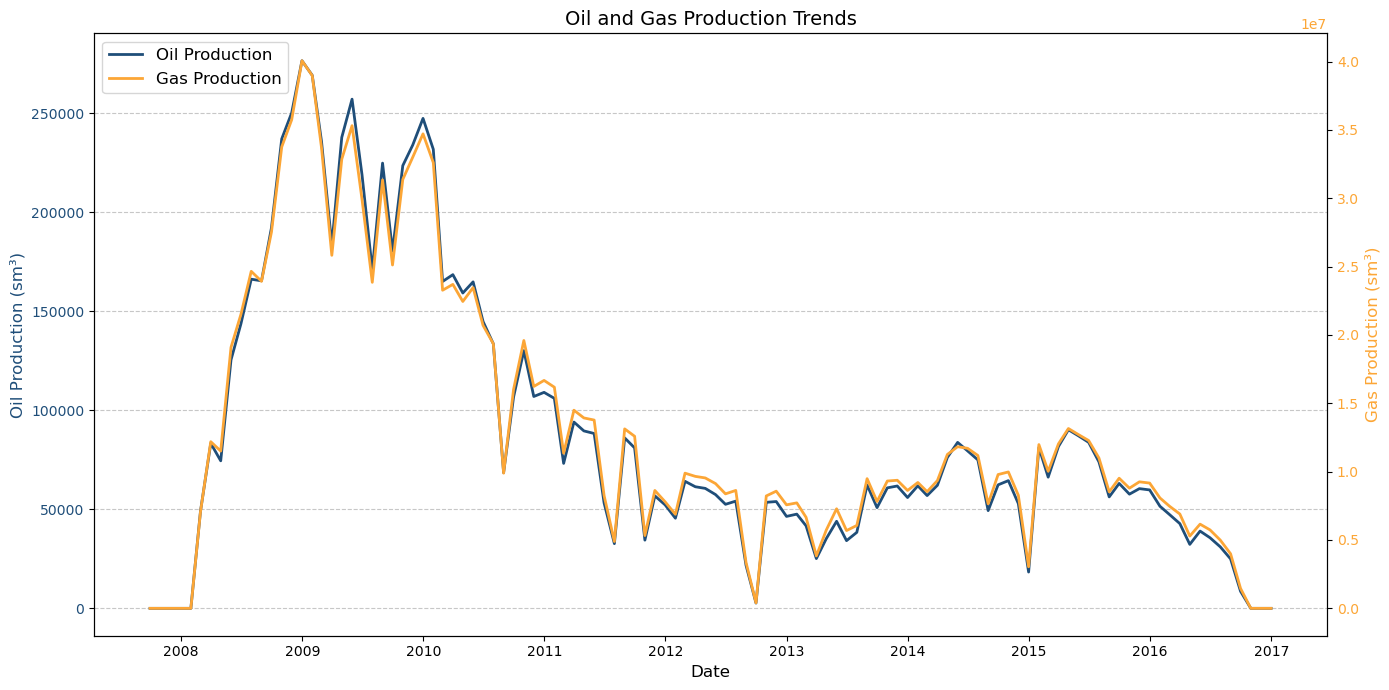

In [13]:
# Resample daily data to monthly totals
monthly_totals = daily_production_df.resample('ME', on="DATEPRD")[["BORE_OIL_VOL", "BORE_GAS_VOL"]].sum().reset_index()

# PLOT GRAPH
fig, ax1 = plt.subplots(figsize=(14, 7))
contrast_colors = plt.cm.plasma([0.2, 0.8])

# Primary axis for Oil
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Oil Production (sm³)", color="#1f4e79", fontsize=12)
oil_line, = ax1.plot(
    monthly_totals["DATEPRD"],
    monthly_totals["BORE_OIL_VOL"],
    color="#1f4e79",
    label="Oil Production",
    linewidth=2,
)
ax1.tick_params(axis="y", labelcolor="#1f4e79")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Secondary axis for Gas
ax2 = ax1.twinx()
ax2.set_ylabel("Gas Production (sm³)", color=contrast_colors[1], fontsize=12)
gas_line, = ax2.plot(
    monthly_totals["DATEPRD"],
    monthly_totals["BORE_GAS_VOL"],
    color=contrast_colors[1],
    label="Gas Production",
    linewidth=2,
)
ax2.tick_params(axis="y", labelcolor=contrast_colors[1])

# Add legends
lines = [oil_line, gas_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left", fontsize=12, frameon=True)

plt.title("Oil and Gas Production Trends", fontsize=14)
fig.tight_layout()
plt.show()

In [14]:
# 3 -- CUMULATIVE PRODUCTION FOR PRODUCER WELLS (OIL, GAS & WATER)

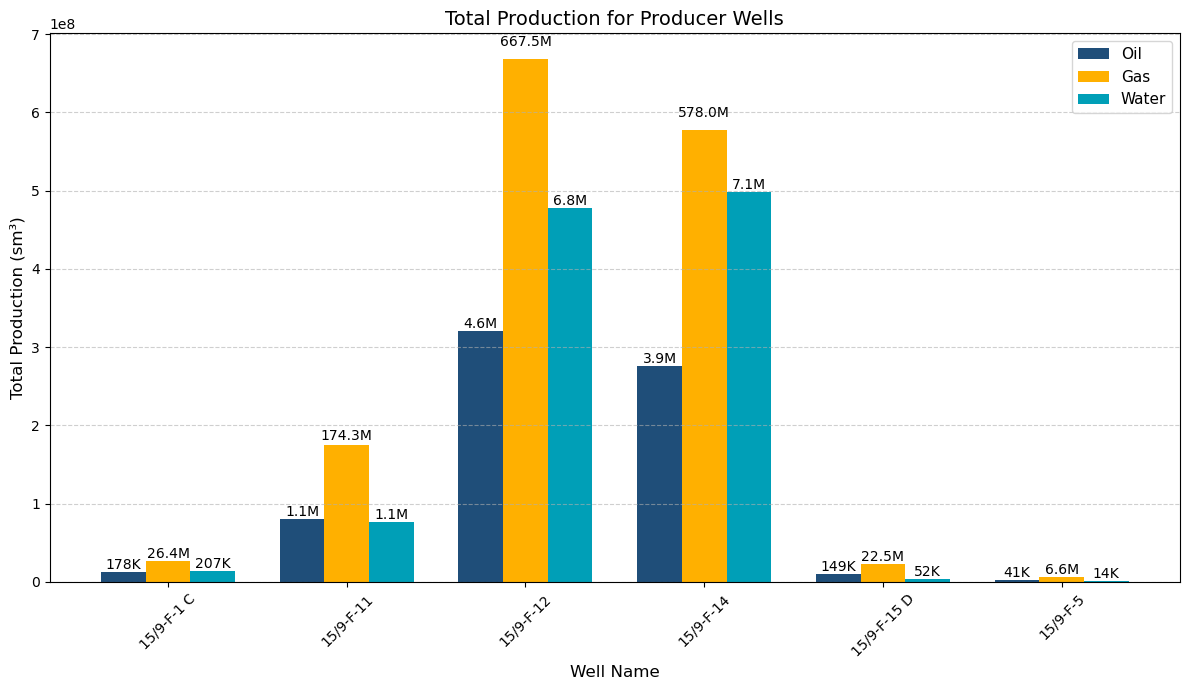

In [15]:
# Initialize lists for production data
well_names = []
oil_production = []
gas_production = []
water_production = []

# Scaling factors for better visualization
oil_scale = 70
water_scale = 70

# Collect production data from all wells
for well in list_of_wells:
    if "OP" in well["WELL_TYPE"].unique():
        well_names.append(well["WELL_NAME"].iloc[0])
        oil_production.append(well["BORE_OIL_VOL"].sum() * oil_scale)
        gas_production.append(well["BORE_GAS_VOL"].sum())
        water_production.append(well["BORE_WAT_VOL"].sum() * water_scale)

# Define bar positions
x = np.arange(len(well_names))
width = 0.25
colors = {
    "oil": "#1f4e79",
    "gas": "#ffb000",
    "water": "#009fb7"
}

def format_number(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.0f}K"
    return str(value)

# Plot Chart
plt.figure(figsize=(12, 7))
plt.bar(x - width, oil_production, width, label="Oil", color=colors["oil"])
plt.bar(x, gas_production, width, label="Gas", color=colors["gas"])
plt.bar(x + width, water_production, width, label="Water", color=colors["water"])
for i, (oil_value, gas_value, water_value) in enumerate(zip(oil_production, gas_production, water_production)):
    plt.text(x[i] - width, oil_value, format_number(oil_value / oil_scale), ha="center", va="bottom", fontsize=10)
    plt.text(x[i], gas_value * 1.02, format_number(gas_value), ha="center", va="bottom", fontsize=10)
    plt.text(x[i] + width, water_value, format_number(water_value / water_scale), ha="center", va="bottom", fontsize=10)

plt.xticks(x, well_names, rotation=45)
plt.ylabel("Total Production (sm³)", fontsize=12)
plt.xlabel("Well Name", fontsize=12)
plt.title("Total Production for Producer Wells", fontsize=14)
plt.legend(loc="upper right", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
# 4 -- COMPARING TOTAL OIL PRODUCTION TOP ALL PRODUCING WELLS

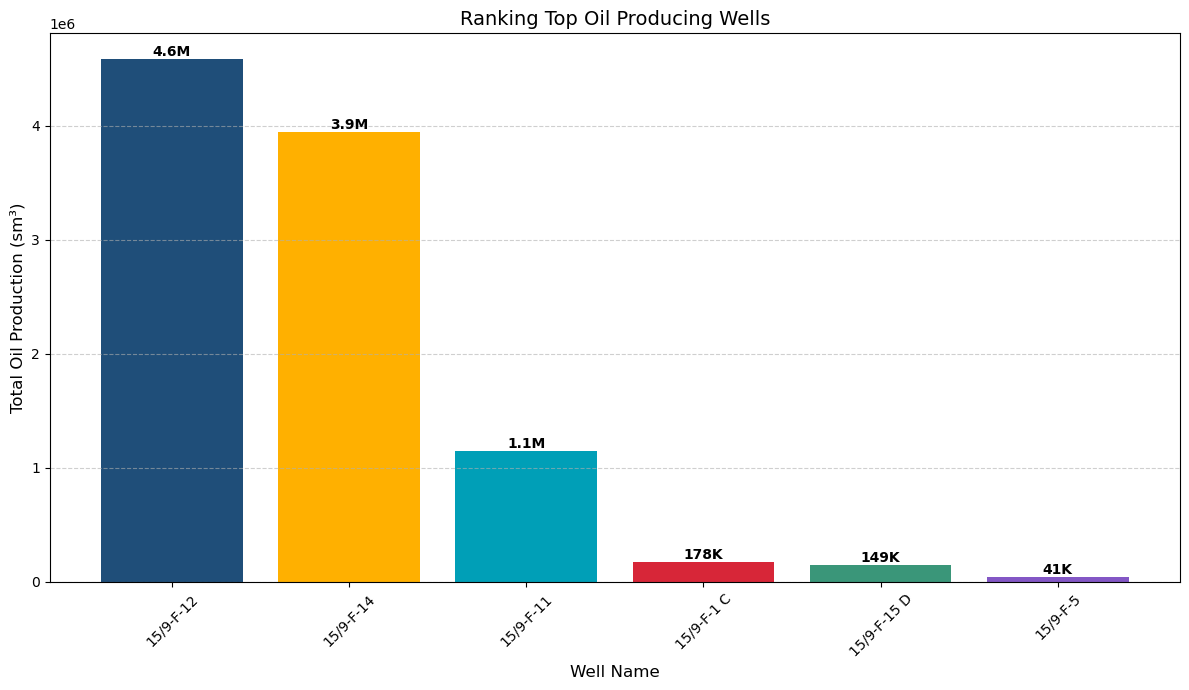

In [17]:
# Function to format large numbers for labels
def format_number(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.0f}K"
    return str(value)

# Function to plot total production for all Producer wells
def plot_all_producers(list_of_wells, production_type="BORE_OIL_VOL"):
    well_production = []
    for well in list_of_wells:
        if "OP" in well["WELL_TYPE"].unique():
            total_production = well[production_type].sum()
            well_name = well["WELL_NAME"].iloc[0]
            well_production.append((well_name, total_production))

    # Sort wells in descending order based on production
    sorted_production = sorted(well_production, key=lambda x: x[1], reverse=True)
    wells, productions = zip(*sorted_production)
    custom_colors = ["#1f4e79", "#ffb000", "#009fb7", "#D72638", "#3A9679", "#8357C5", "#F4A261"]
    cmap = plt.get_cmap("tab10")
    colors = [custom_colors[i % len(custom_colors)] for i in range(len(wells))]

    # Plot bar chart
    plt.figure(figsize=(12, 7))
    bars = plt.bar(wells, productions, color=colors)
    for bar, production in zip(bars, productions):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            format_number(production),
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )
    production_label = production_type.split("_")[1].capitalize()

    plt.title(f"Ranking Top Oil Producing Wells", fontsize=14)
    plt.xlabel("Well Name", fontsize=12)
    plt.ylabel(f"Total {production_label} Production (sm³)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot total oil production for all OP wells
plot_all_producers(list_of_wells, production_type="BORE_OIL_VOL")

In [18]:
# 5 -- COMPARING HISTORICAL OIL PRODUCTION TRENDS FOR ALL PRODUCING WELLS

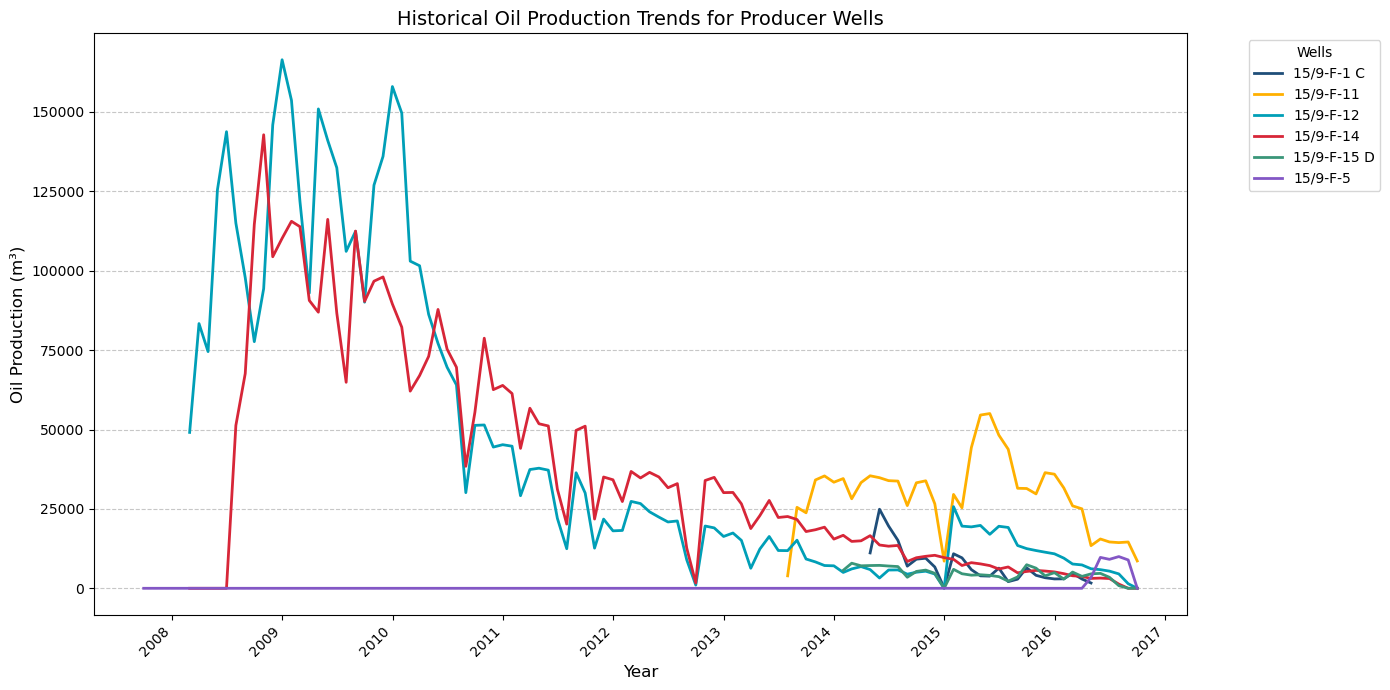

In [19]:
# Filter valid wells with production
valid_wells = daily_production_df.groupby("NPD_WELL_BORE_NAME")["BORE_OIL_VOL"].sum()
valid_wells = valid_wells[valid_wells > 0].index.tolist()

custom_colors = ["#1f4e79", "#ffb000", "#009fb7", "#D72638", "#3A9679", "#8357C5", "#F4A261"]
cmap = plt.get_cmap("tab10")
colors = {well: custom_colors[i % len(custom_colors)] for i, well in enumerate(valid_wells)}

# Resample to Monthly Production
monthly_production = daily_production_df.groupby(["NPD_WELL_BORE_NAME", pd.Grouper(key="DATEPRD", freq="ME")])["BORE_OIL_VOL"].sum().reset_index()

# PLOT GRAPH
plt.figure(figsize=(14, 7))

# Plot oil production trends for all valid producer wells
for well_name, group in monthly_production.groupby("NPD_WELL_BORE_NAME"):
    if well_name in valid_wells:  # Include only wells with production
        plt.plot(group["DATEPRD"], group["BORE_OIL_VOL"], label=well_name, linewidth=2, color=colors[well_name])

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Oil Production (m³)", fontsize=12)
plt.title("Historical Oil Production Trends for Producer Wells", fontsize=14)
plt.legend(title="Wells", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [20]:
# 6 -- INDIVIDUAL WELL PERFORMANCE TRENDS (OIL PRODUCTION)

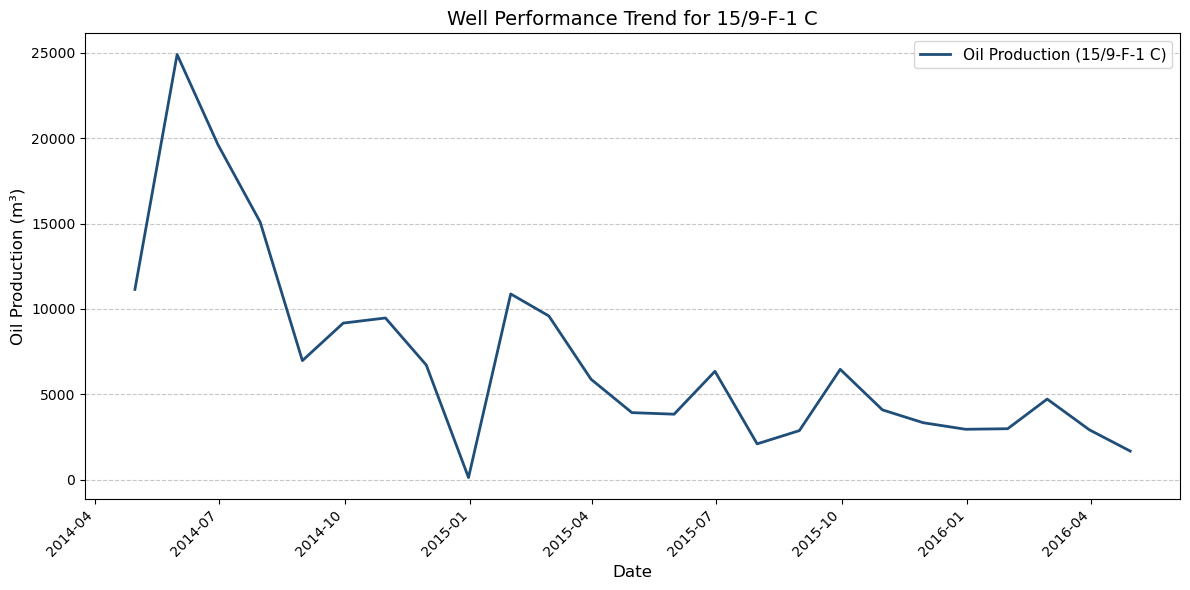

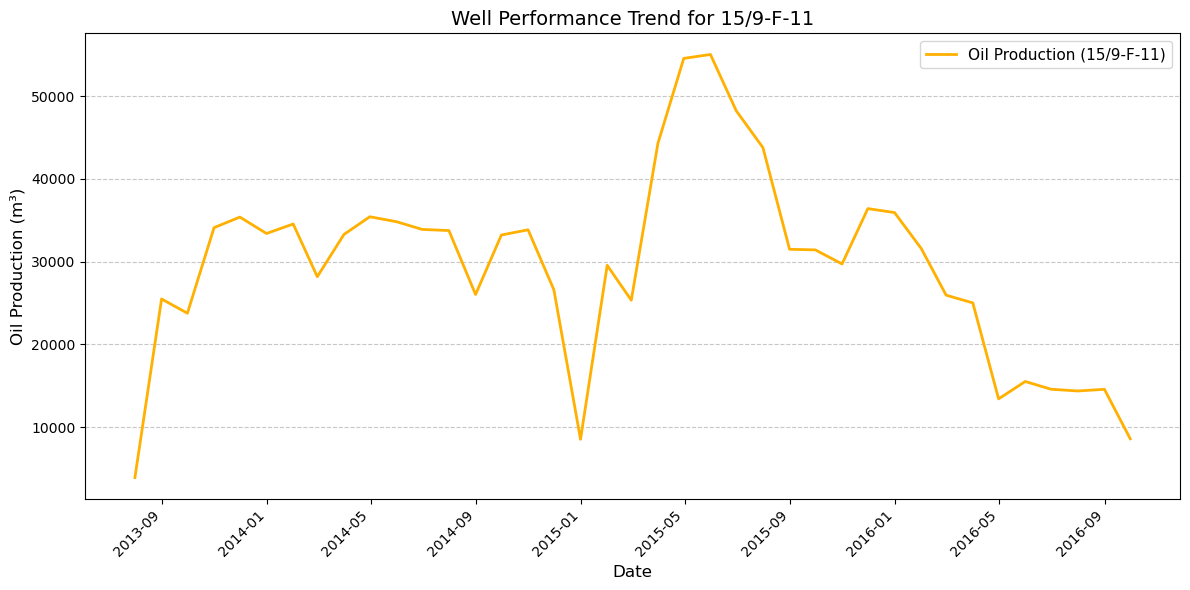

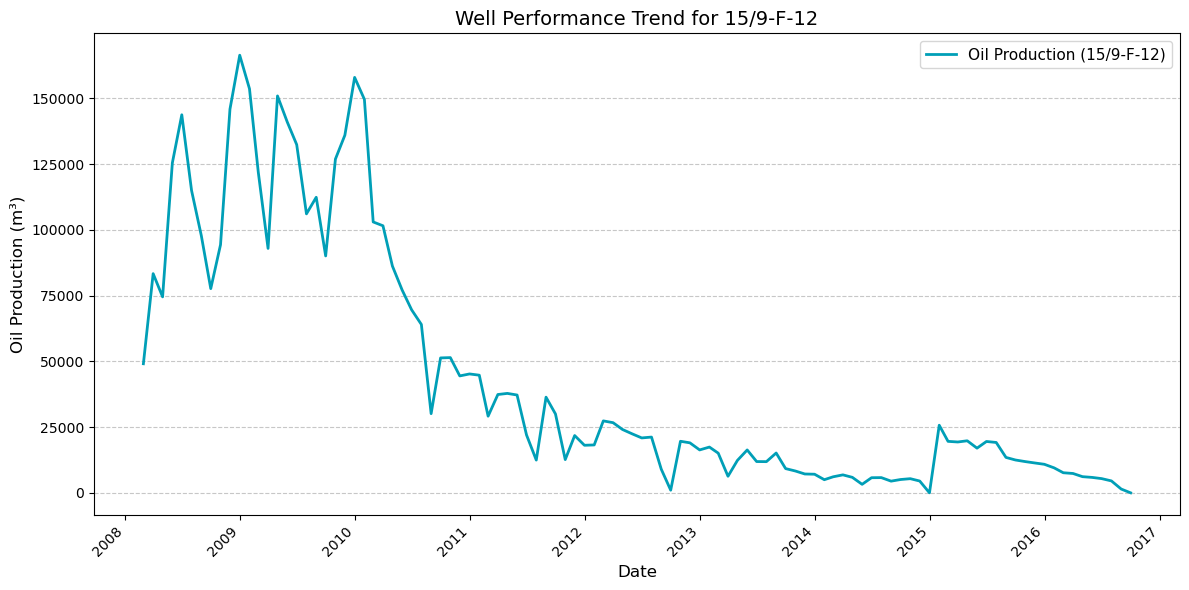

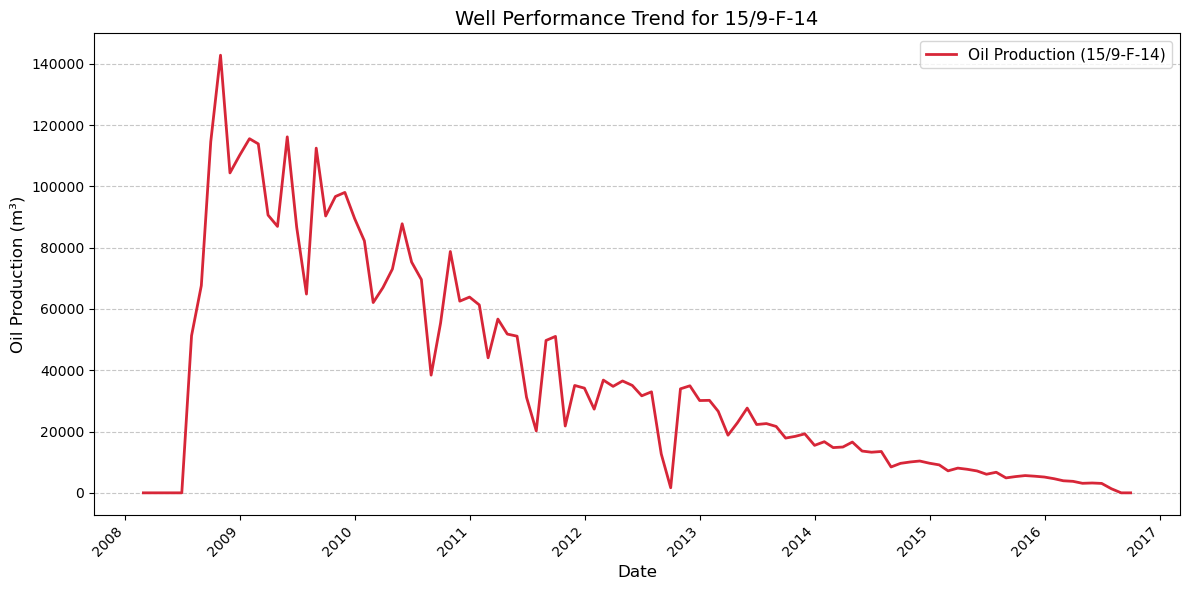

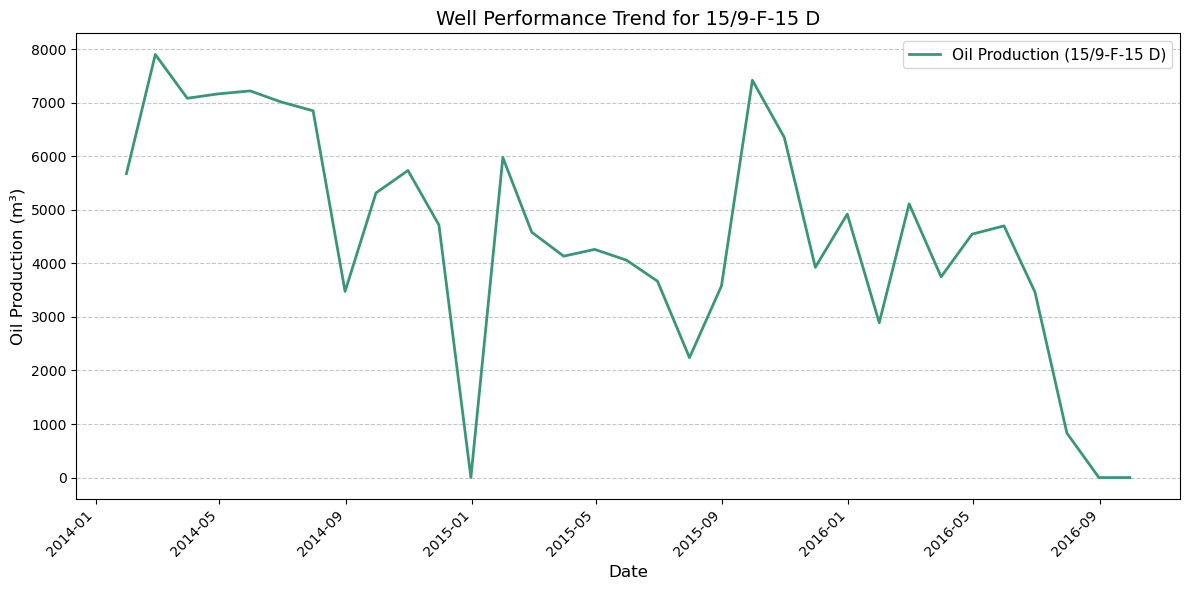

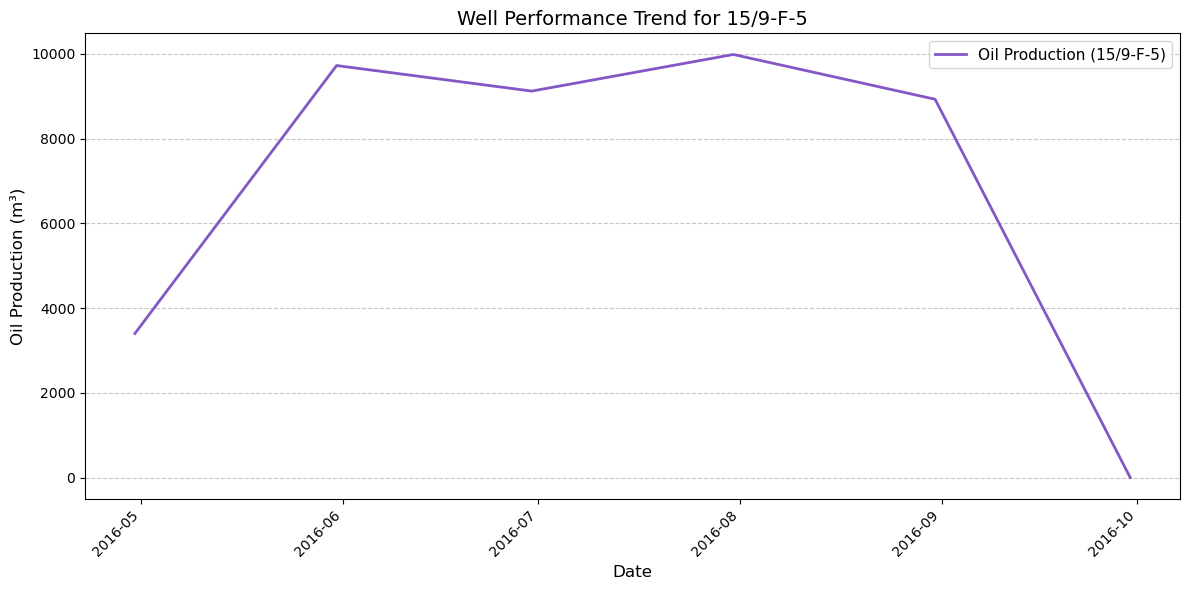

In [21]:
custom_colors = ["#1f4e79", "#ffb000", "#009fb7", "#D72638", "#3A9679", "#8357C5", "#F4A261"]

# Function to plot individual well performance
def plot_well_performance(well_name, df, color):
    plt.figure(figsize=(12, 6))
    well_data = df[df["NPD_WELL_BORE_NAME"] == well_name]
    if well_name == "15/9-F-5":
        well_data = well_data[well_data["FLOW_KIND"].str.lower() == "production"]

    # Resample to monthly oil production
    monthly_well_data = well_data.resample("ME", on="DATEPRD")["BORE_OIL_VOL"].sum()

    # Plot
    plt.plot(monthly_well_data.index, monthly_well_data.values, linewidth=2, color=color, label=f"Oil Production ({well_name})")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Oil Production (m³)", fontsize=12)
    plt.title(f"Well Performance Trend for {well_name}", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(loc="upper right", fontsize=11)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Loop through all wells to plot their data
for i, well in enumerate(valid_wells):
    plot_well_performance(well, daily_production_df, custom_colors[i % len(custom_colors)])

In [22]:
# 7 -- HISTORICAL WATER INJECTION TRENDS FOR ALL INJECTORS

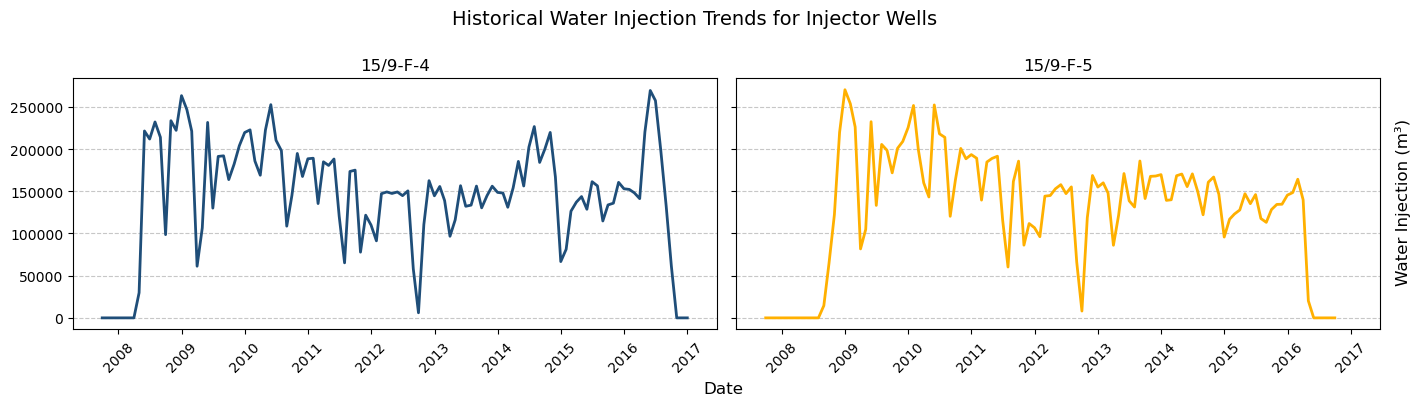

In [23]:
# Identify injector wells
injector_wells = daily_production_df.groupby("NPD_WELL_BORE_NAME")["BORE_WI_VOL"].sum()
injector_wells = injector_wells[injector_wells > 0].index.tolist()

custom_colors = ["#1f4e79", "#ffb000", "#009fb7", "#D72638", "#3A9679", "#8357C5", "#F4A261"]

# Plot injection trends data
num_wells = len(injector_wells)
cols = 2
rows = -(-num_wells // cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), sharex=True, sharey=True)
axes = axes.flatten()

for i, well in enumerate(injector_wells):
    ax = axes[i]
    well_data = daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == well]
    monthly_well_data = well_data.resample("ME", on="DATEPRD")["BORE_WI_VOL"].sum()
    
    ax.plot(monthly_well_data.index, monthly_well_data.values, linewidth=2, color=custom_colors[i % len(custom_colors)])
    ax.set_title(well, fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.tick_params(axis="x", rotation=45)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle("Historical Water Injection Trends for Injector Wells", fontsize=14)
fig.text(0.52, 0.02, "Date", ha="center", fontsize=12)
fig.text(1, 0.5, "Water Injection (m³)", va="center", rotation="vertical", fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [24]:
# 8-- OVERALL WATER INJECTION VS PRODUCTION TRENDS

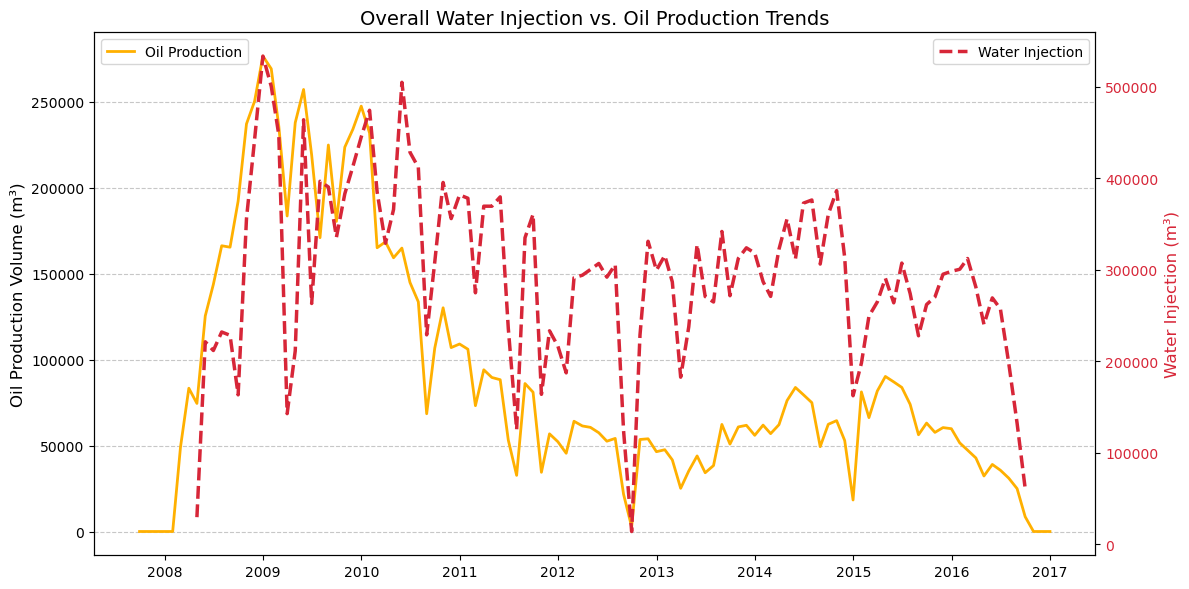

In [25]:
# Resample data to monthly totals
monthly_data = (
    daily_production_df
    .set_index("DATEPRD")
    .resample("ME")[["BORE_OIL_VOL"]]
    .sum()
)

colors = {
    "oil": "#ffb000",
    "injection": "#D72638" 
}


# Compute total monthly water injection
monthly_injection = (
    daily_production_df[daily_production_df["BORE_WI_VOL"] > 0]
    .set_index("DATEPRD")
    .resample("ME")["BORE_WI_VOL"]
    .sum()
)


# Plot oil production trends (Primary Y-Axis)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(
    monthly_data.index, monthly_data["BORE_OIL_VOL"],
    color=colors["oil"], linewidth=2, label="Oil Production"
)

ax1.set_ylabel("Oil Production Volume (m³)", fontsize=12)
ax1.tick_params(axis="y")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Plot water injection trend (Secondary Y-Axis)
ax2 = ax1.twinx()
ax2.plot(
    monthly_injection.index, monthly_injection.values,
    linestyle="--", color=colors["injection"], linewidth=2.5, label="Water Injection"
)
ax2.set_ylabel("Water Injection (m³)", fontsize=12, color=colors["injection"])
ax2.tick_params(axis="y", labelcolor=colors["injection"])

plt.title("Overall Water Injection vs. Oil Production Trends", fontsize=14)
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [26]:
# 9-- WELL-SPECIFIC WATER INJECTION INFLUENCE ON OIL PRODUCTION

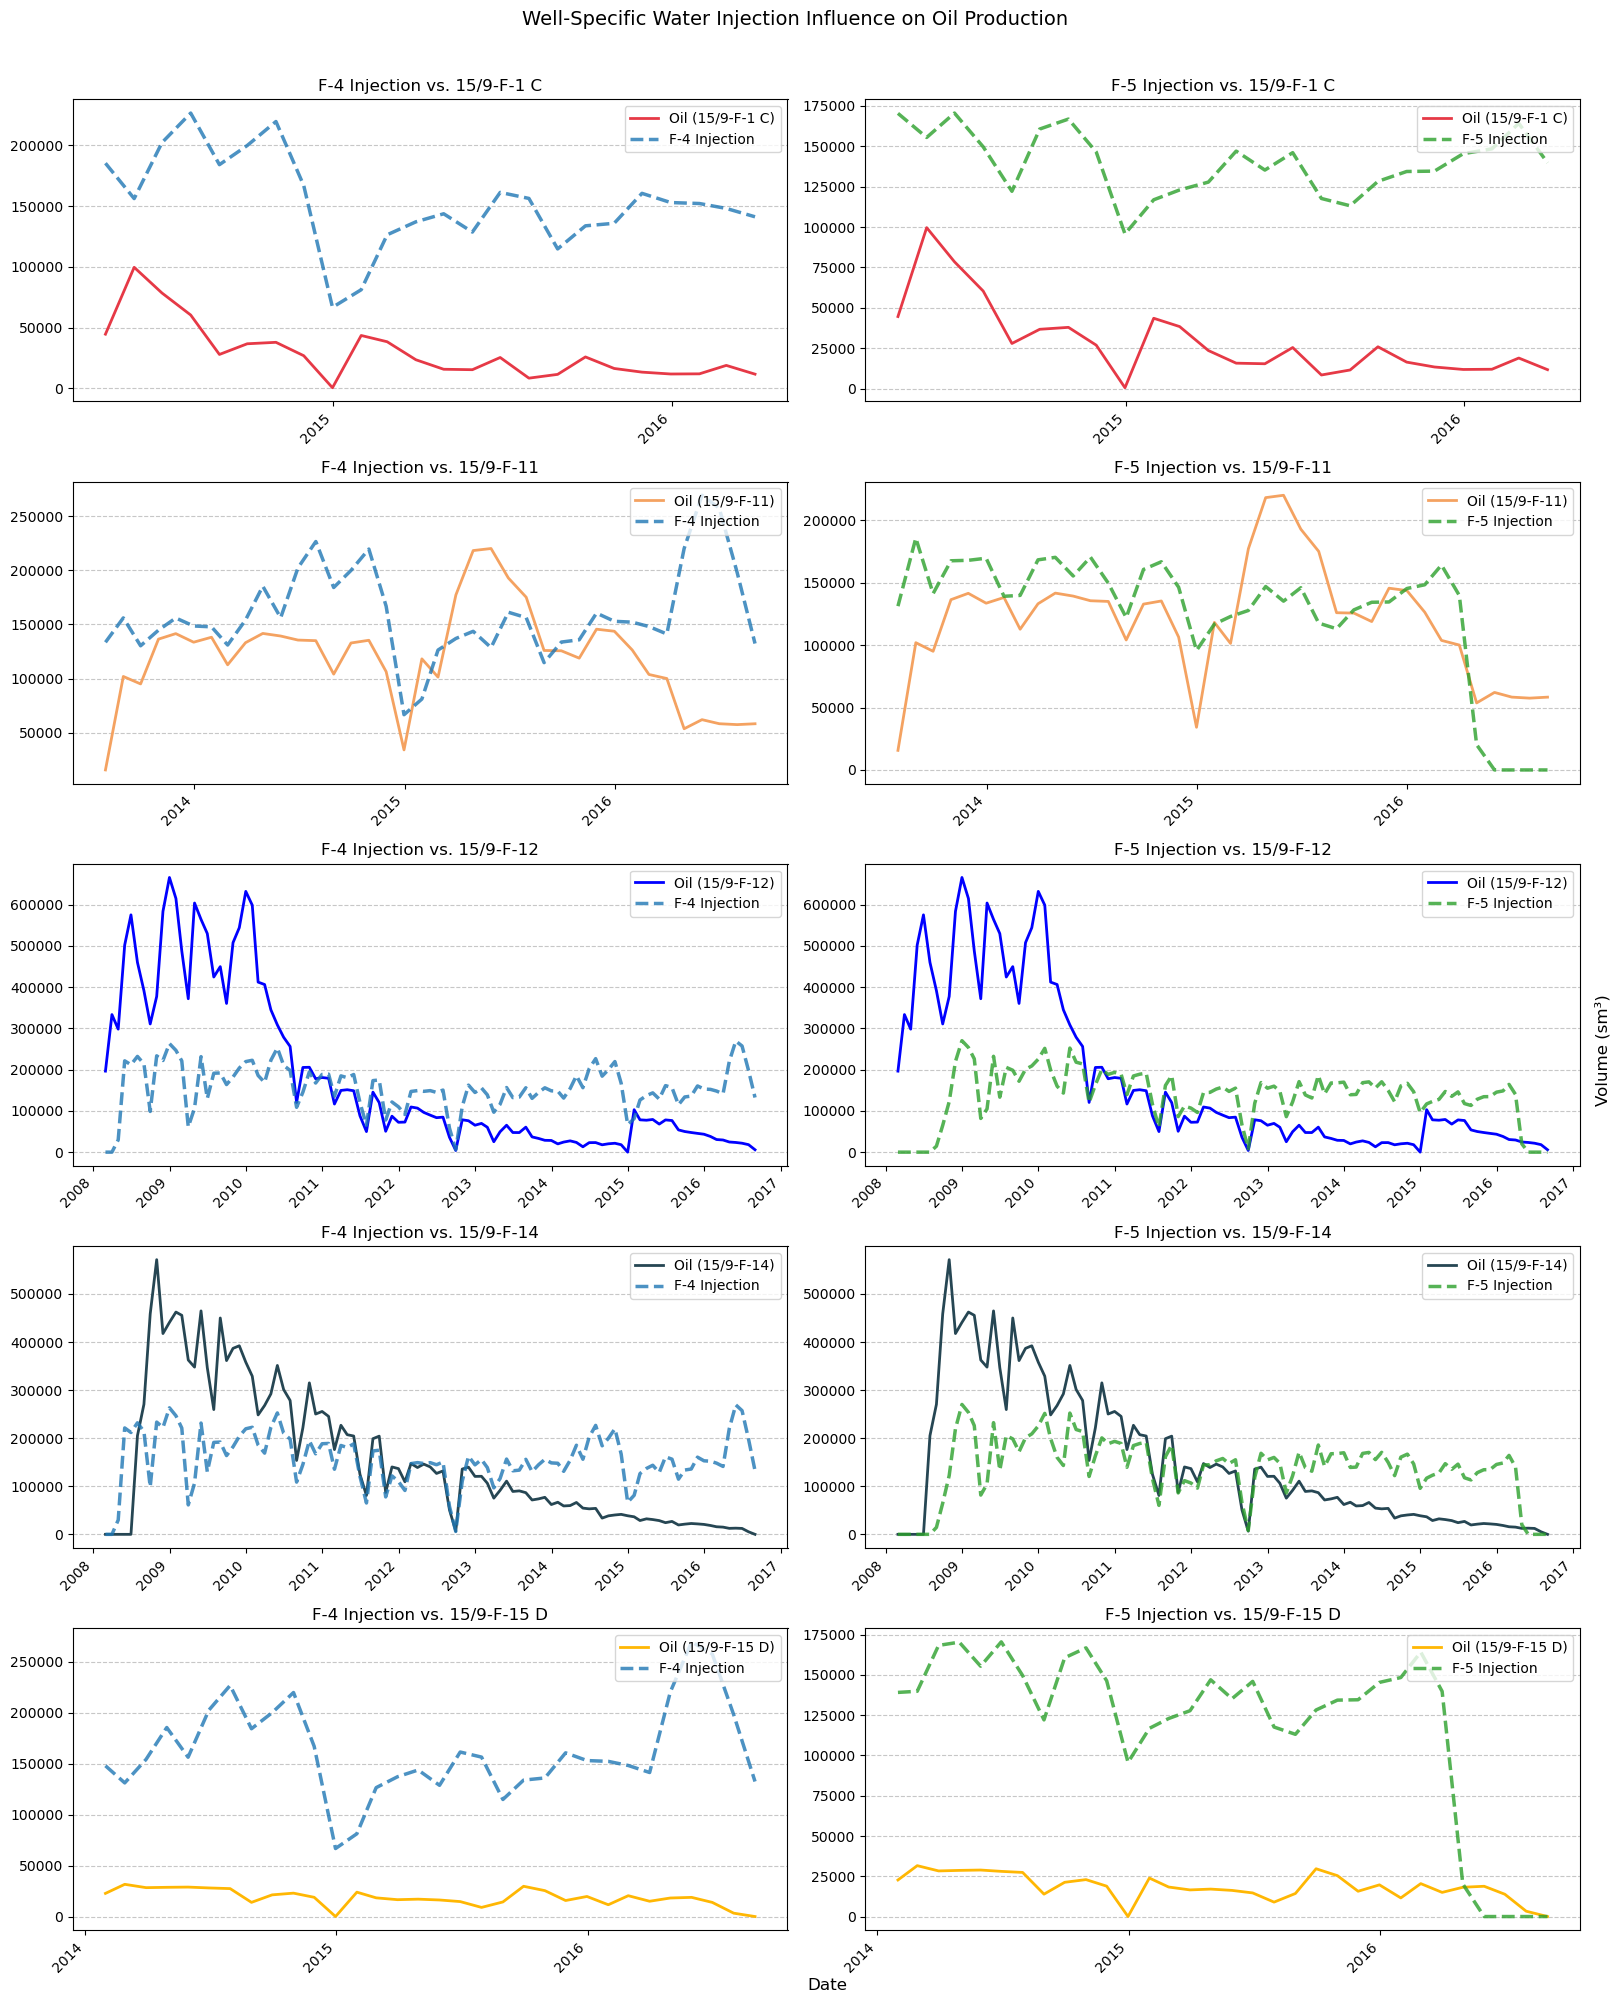

In [27]:
custom_colors = ["#E63946", "#F4A261", "blue", "#264653", "#FFB703", "#8A2BE2", "#FF69B4"]
oil_scale = 4  # for scaling up oil bar

valid_wells_filtered = [well for well in valid_wells if well != "15/9-F-5"]

# Create subplots for side-by-side comparisons
fig, axes = plt.subplots(len(valid_wells_filtered), 2, figsize=(16, len(valid_wells_filtered) * 4), sharex=False, sharey=False)

for i, well in enumerate(valid_wells_filtered):
    well_data = daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == well]

    # Define production period for each well
    production_start, production_end = well_data["DATEPRD"].min(), well_data["DATEPRD"].max()

    # Resample production data within the well's active period
    monthly_well_data = (
        well_data.set_index("DATEPRD")
        .resample("ME")["BORE_OIL_VOL"]
        .sum()
        .loc[production_start:production_end] * oil_scale
    )

    # Filter injection data to match the production period of the well
    f4_injection = (
        daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == "15/9-F-4"]
        .set_index("DATEPRD")
        .resample("ME")["BORE_WI_VOL"]
        .sum()
        .loc[production_start:production_end]
    )

    f5_injection = (
        daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == "15/9-F-5"]
        .set_index("DATEPRD")
        .resample("ME")["BORE_WI_VOL"]
        .sum()
        .loc[production_start:production_end]
    )

    # Left: F-4 vs. Producer Well
    ax1 = axes[i, 0]
    ax1.plot(monthly_well_data.index, monthly_well_data.values, linewidth=2, color=custom_colors[i % len(custom_colors)], label=f"Oil ({well})")
    ax1.plot(f4_injection.index, f4_injection.values, linestyle="--", linewidth=2.5, color="#1f77b4", label="F-4 Injection", alpha=0.8)
    ax1.set_title(f"F-4 Injection vs. {well}", fontsize=12)
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    ax1.legend(fontsize=10, loc="upper right")

    # Right: F-5 vs. Producer Well
    ax2 = axes[i, 1]
    ax2.plot(monthly_well_data.index, monthly_well_data.values, linewidth=2, color=custom_colors[i % len(custom_colors)], label=f"Oil ({well})")
    ax2.plot(f5_injection.index, f5_injection.values, linestyle="--", linewidth=2.5, color="#2ca02c", label="F-5 Injection", alpha=0.8)
    ax2.set_title(f"F-5 Injection vs. {well}", fontsize=12)
    ax2.grid(axis="y", linestyle="--", alpha=0.7)
    ax2.legend(fontsize=10, loc="upper right")

    for ax in [ax1, ax2]:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")

fig.suptitle("Well-Specific Water Injection Influence on Oil Production", fontsize=14, y=1.02)
fig.text(0.52, 0.03, "Date", ha="center", fontsize=12)
fig.text(1, 0.5, "Volume (sm³)", va="center", rotation="vertical", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 1.01])
plt.show()

In [28]:
 # 10-- Total Injection vs Oil Production by Wells

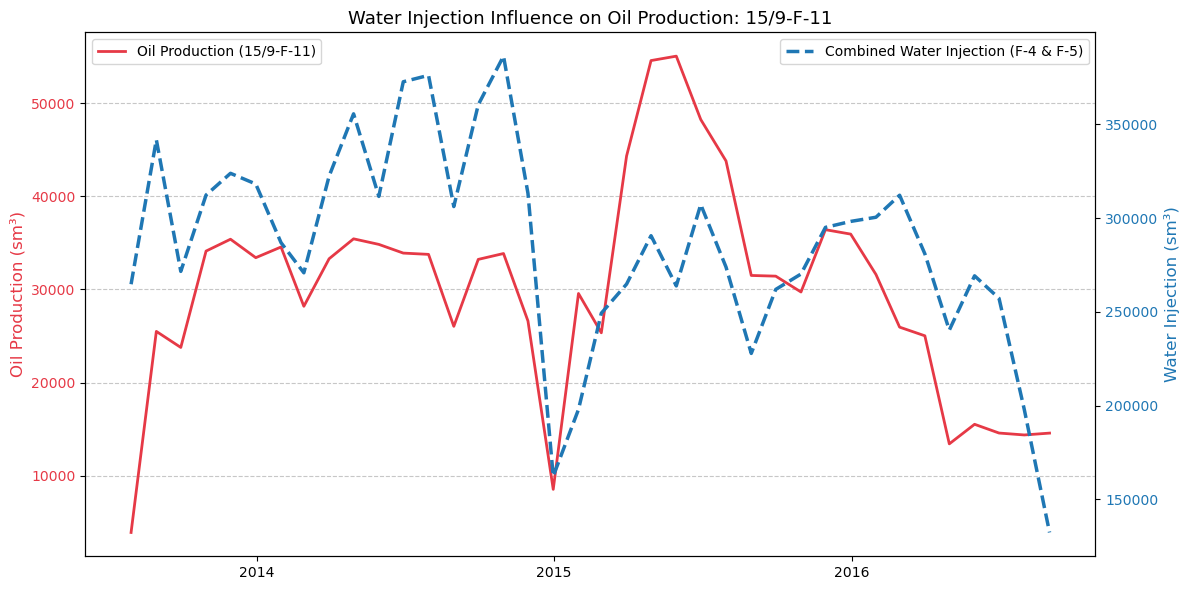

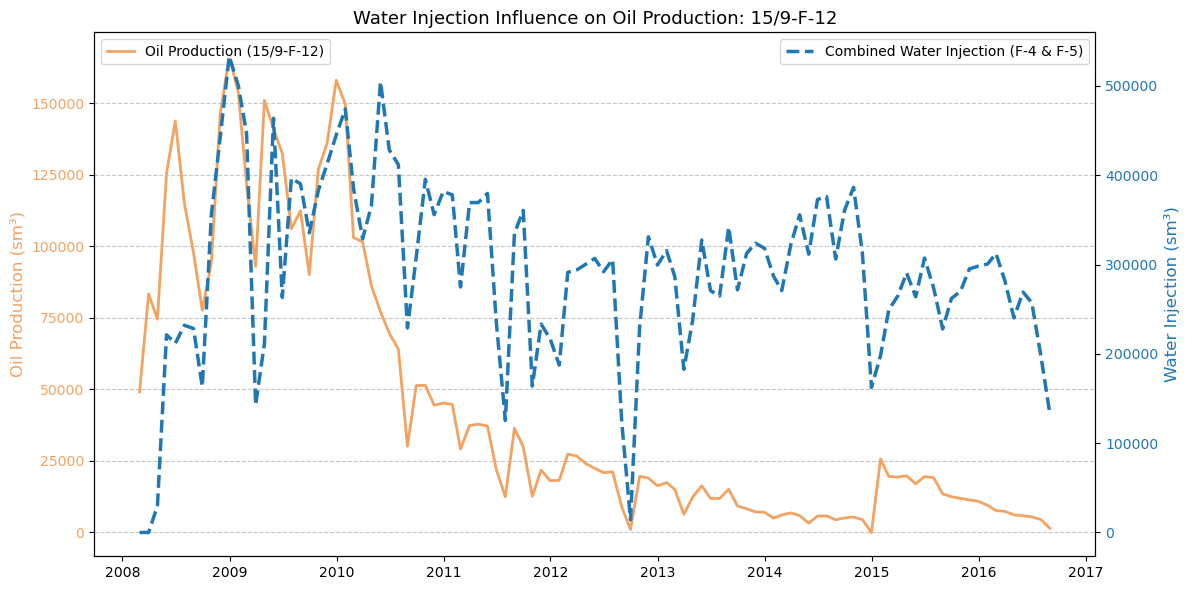

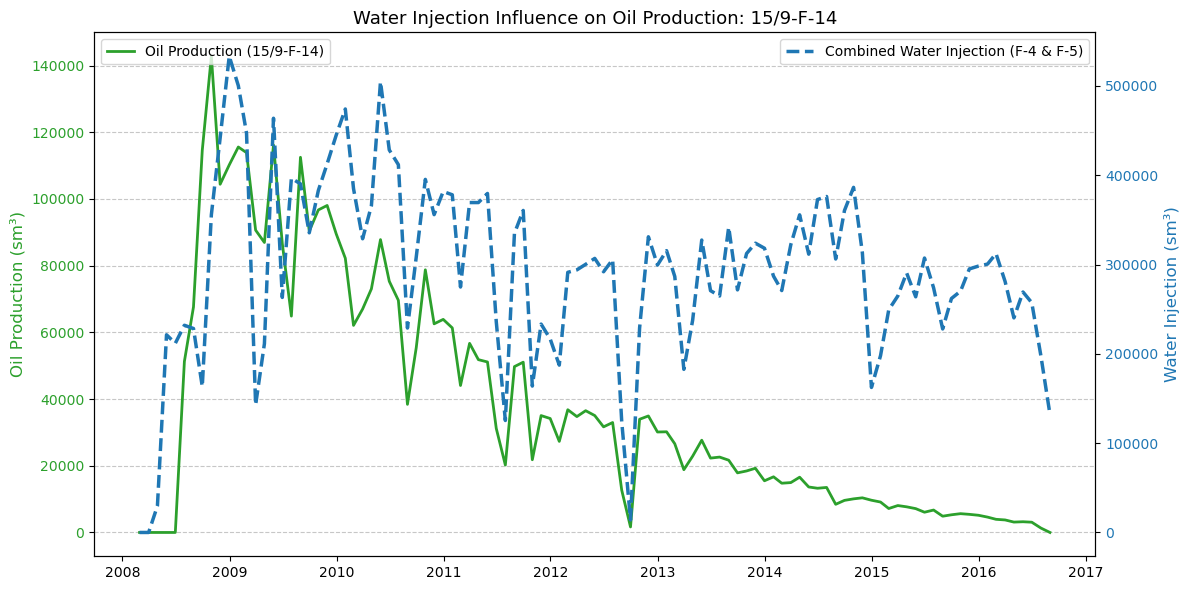

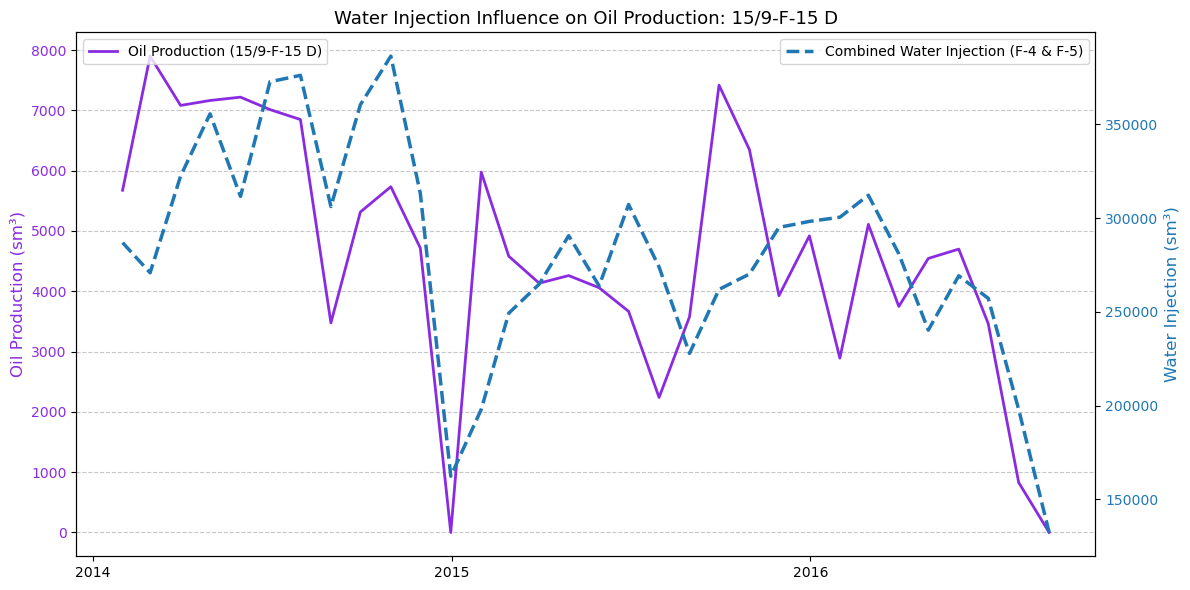

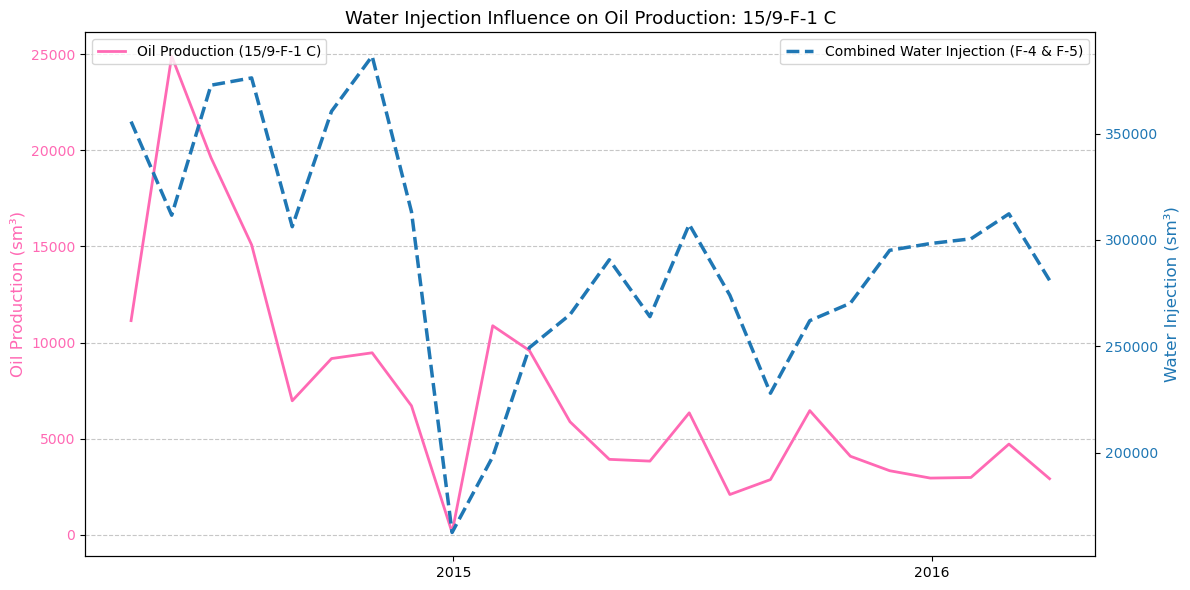

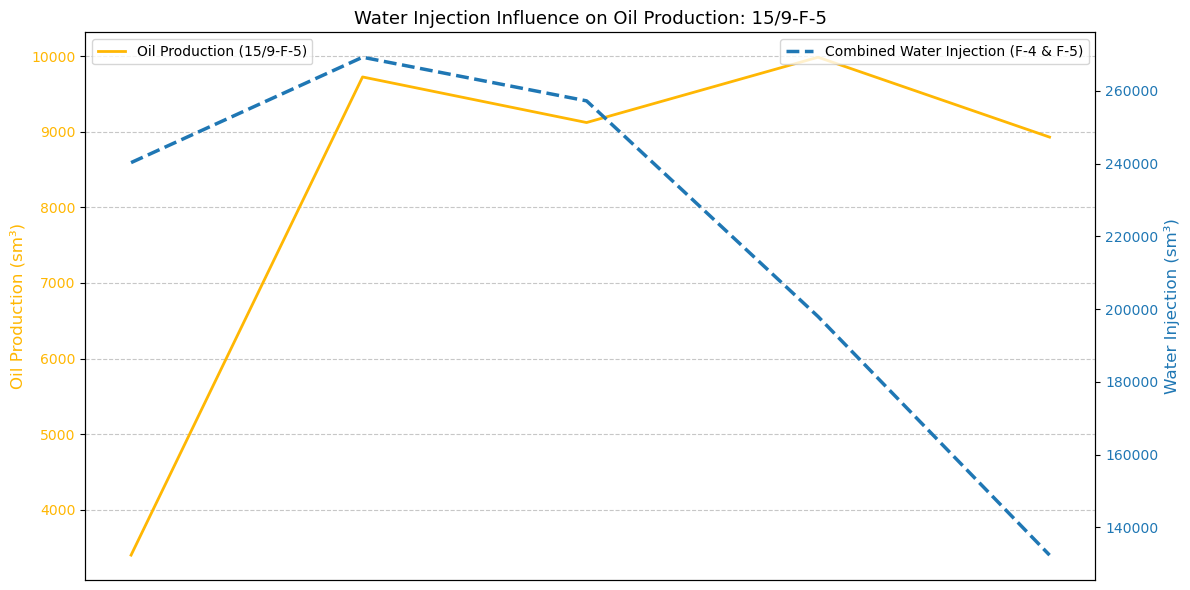

In [29]:
target_wells = ["15/9-F-11", "15/9-F-12", "15/9-F-14", "15/9-F-15 D", "15/9-F-1 C", "15/9-F-5"]

colors = {
    "15/9-F-11": "#E63946",
    "15/9-F-12": "#F4A261",
    "15/9-F-14": "#2ca02c",
    "15/9-F-15 D": "#8A2BE2",
    "15/9-F-1 C": "#FF69B4",
    "15/9-F-5": "#FFB703",
    "injection": "#1f77b4"
}

# Plot injection vs production for all producer wells
for well in target_wells:
    well_data = daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == well]

    if well == "15/9-F-5":
        well_data = well_data[well_data["FLOW_KIND"] == "production"]    
    production_start, production_end = well_data["DATEPRD"].min(), well_data["DATEPRD"].max()
    
    monthly_oil = (
        well_data.set_index("DATEPRD")
        .resample("ME")["BORE_OIL_VOL"]
        .sum()
        .loc[production_start:production_end]
    )
    combined_injection = (
        daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"].isin(["15/9-F-4", "15/9-F-5"])]
        .set_index("DATEPRD")
        .resample("ME")["BORE_WI_VOL"]
        .sum()
        .loc[production_start:production_end]
    )

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot oil production (Primary Y-Axis)
    ax1.plot(
        monthly_oil.index, monthly_oil.values,
        linewidth=2, color=colors[well], label=f"Oil Production ({well})"
    )
    ax1.set_ylabel("Oil Production (sm³)", fontsize=12, color=colors[well])
    ax1.tick_params(axis="y", labelcolor=colors[well])
    ax1.grid(axis="y", linestyle="--", alpha=0.7)

    # Plot ater injection (Secondary Y-Axis)
    ax2 = ax1.twinx()
    ax2.plot(
        combined_injection.index, combined_injection.values,
        linestyle="--", linewidth=2.5, color=colors["injection"], label="Combined Water Injection (F-4 & F-5)"
    )
    ax2.set_ylabel("Water Injection (sm³)", fontsize=12, color=colors["injection"])
    ax2.tick_params(axis="y", labelcolor=colors["injection"])

    ax1.set_title(f"Water Injection Influence on Oil Production: {well}", fontsize=13)
    ax1.legend(loc="upper left", fontsize=10)
    ax2.legend(loc="upper right", fontsize=10)
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45, ha="right")
    
    plt.xlabel("Date", fontsize=12)
    plt.tight_layout()
    plt.show()

In [30]:
# 11-- WOR (WATER-OIL-RATIO) TREND ANALYSIS: WOR Trends for All Producer Wells

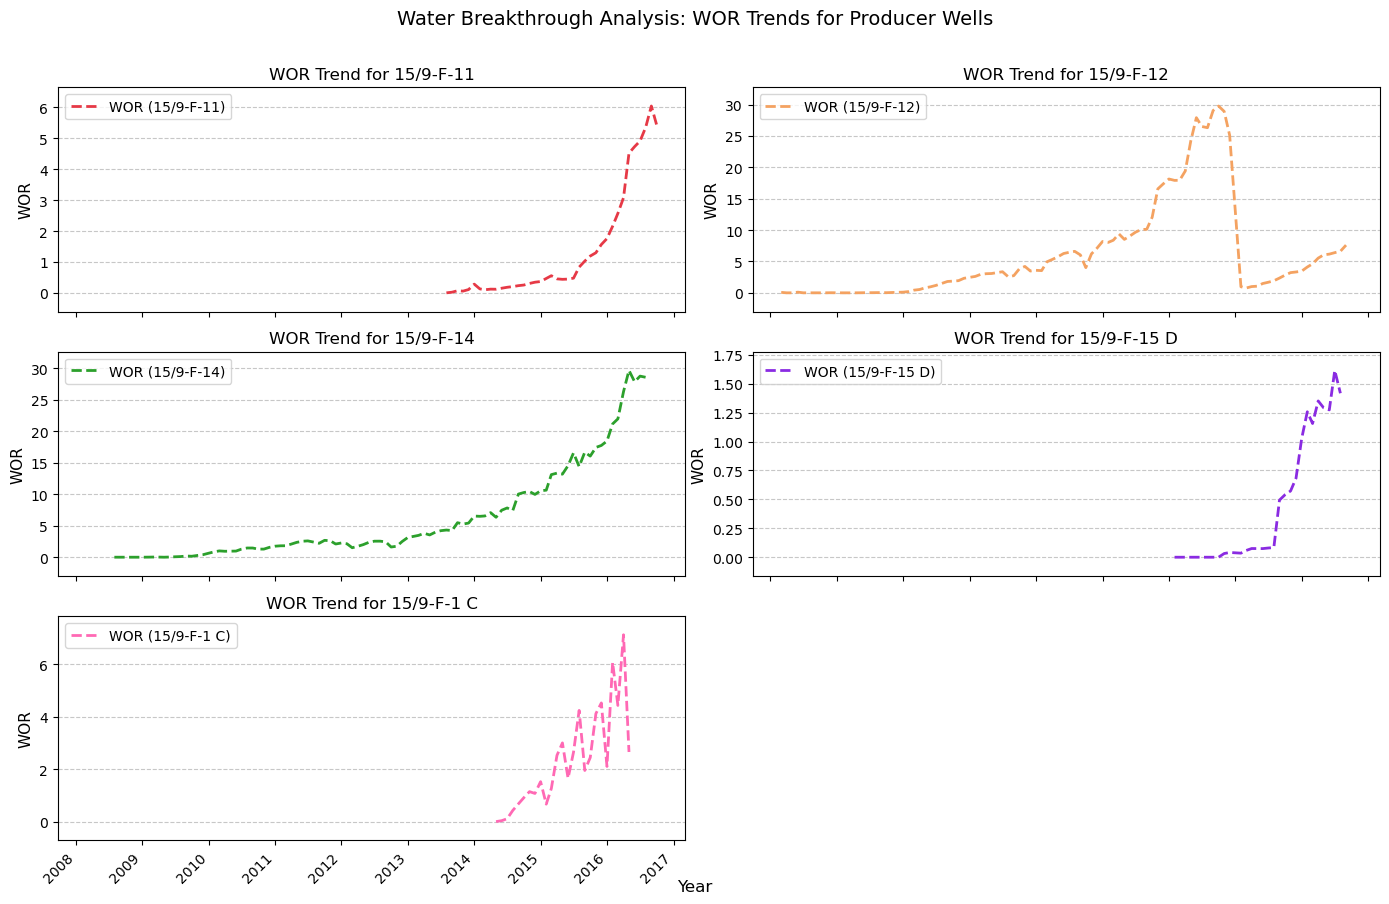

In [31]:
selected_wells = ["15/9-F-11", "15/9-F-12", "15/9-F-14", "15/9-F-15 D", "15/9-F-1 C"]
well_colors = {
    "15/9-F-11": "#E63946", 
    "15/9-F-12": "#F4A261", 
    "15/9-F-14": "#2ca02c", 
    "15/9-F-15 D": "#8A2BE2", 
    "15/9-F-1 C": "#FF69B4"
}

# Create subplots with shared x-axis
cols = 2
rows = -(-len(selected_wells) // cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3), sharex=True, sharey=False)
axes = axes.flatten()

# Loop through selected wells and plot their WOR trends
for i, well in enumerate(selected_wells):
    ax = axes[i]  # Assign subplot
    
    well_data = daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == well]

    # Resample WOR to monthly trends
    monthly_wor = well_data.resample("ME", on="DATEPRD")["WOR"].mean().dropna()
    
    min_wor, max_wor = monthly_wor.min(), monthly_wor.max()
    buffer = (max_wor - min_wor) * 0.1 if max_wor > min_wor else 0.1

    # Plot WOR trend
    ax.plot(monthly_wor.index, monthly_wor.values, linestyle="--", linewidth=2, color=well_colors.get(well, "blue"), label=f"WOR ({well})")

    ax.set_title(f"WOR Trend for {well}", fontsize=12)
    ax.set_ylabel("WOR", fontsize=11)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend(fontsize=10, loc="upper left")

    ax.set_ylim(min_wor - buffer, max_wor + buffer)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Water Breakthrough Analysis: WOR Trends for Producer Wells", fontsize=14, y=1.02)
fig.text(0.5, 0.04, "Year", ha="center", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 1.01])
plt.show()

In [32]:
# 12 -- WATER BREAKTHROUGH ANALYSIS: WOR vs INJECTION vs OIL PRODUCTION DECLINE (F11, F12, F14)

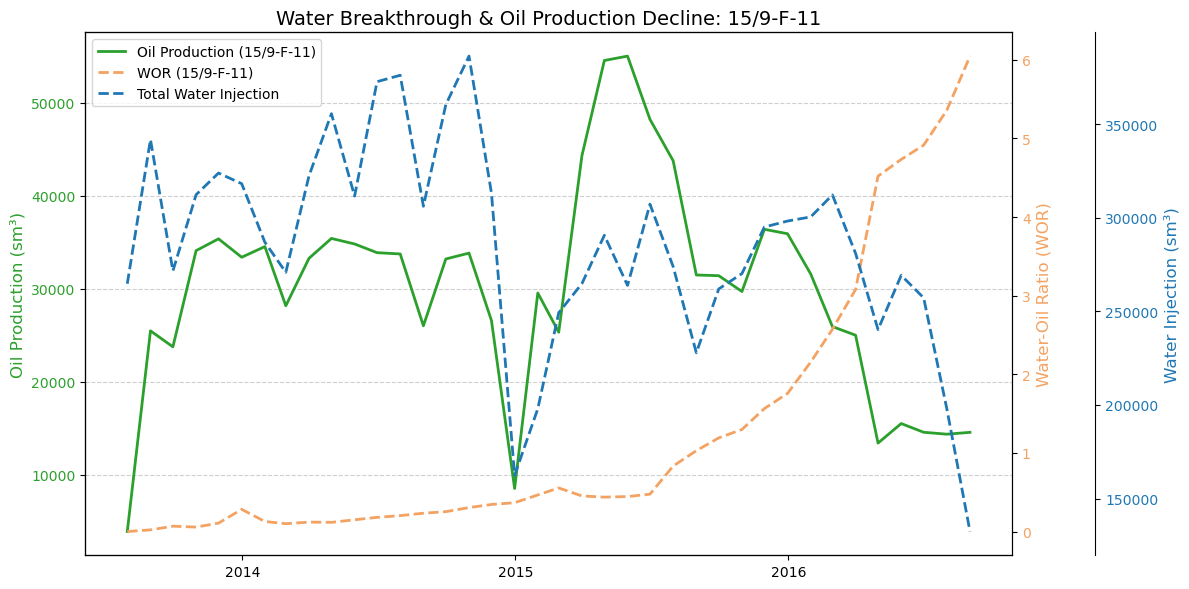

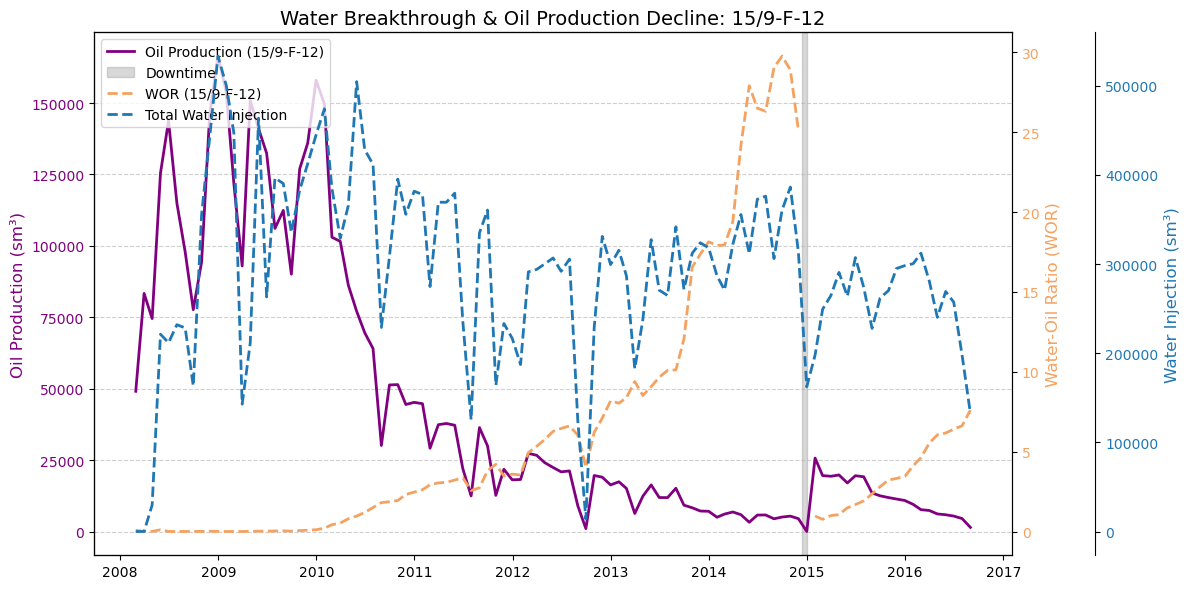

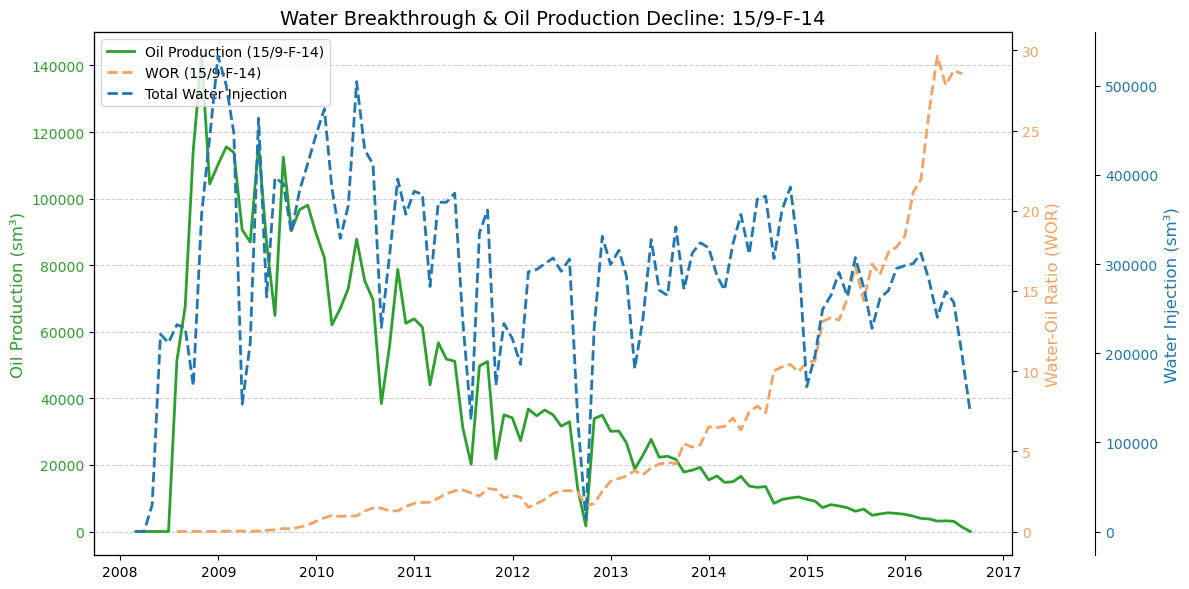

In [33]:
target_wells = ["15/9-F-11", "15/9-F-12", "15/9-F-14"]

well_colors = {
    "15/9-F-11": "#2ca02c",
    "15/9-F-12": "purple",
    "15/9-F-14": "#2ca02c"
}
wor_color = "#F4A261"
injection_color = "#1f77b4"

# Loop through each well and generate individual plots
for well in target_wells:
    well_data = daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == well]
    production_start, production_end = well_data["DATEPRD"].min(), well_data["DATEPRD"].max()
    monthly_oil = (
        well_data.set_index("DATEPRD")
        .resample("ME")["BORE_OIL_VOL"]
        .sum()
        .loc[production_start:production_end]
    )

    monthly_wor = (
        well_data.dropna(subset=["WOR"])
        .set_index("DATEPRD")
        .resample("ME")["WOR"]
        .mean()
        .loc[production_start:production_end]
    )
    total_injection = (
        daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"].isin(["15/9-F-4", "15/9-F-5"])]
        .set_index("DATEPRD")
        .resample("ME")["BORE_WI_VOL"]
        .sum()
        .loc[production_start:production_end]
    )
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Oil Production (Primary Y-Axis)
    ax1.plot(
        monthly_oil.index, monthly_oil.values,
        linewidth=2, color=well_colors[well], label=f"Oil Production ({well})"
    )
    ax1.set_ylabel("Oil Production (sm³)", fontsize=12, color=well_colors[well])
    ax1.tick_params(axis="y", labelcolor=well_colors[well])
    ax1.grid(axis="y", linestyle="--", alpha=0.7)

    # Overlay WOR (Secondary Y-Axis 1)
    ax2 = ax1.twinx()
    ax2.plot(
        monthly_wor.index, monthly_wor.values,
        linestyle="--", linewidth=2, color=wor_color, label=f"WOR ({well})"
    )
    ax2.set_ylabel("Water-Oil Ratio (WOR)", fontsize=12, color=wor_color)
    ax2.tick_params(axis="y", labelcolor=wor_color)

    # Overlay Total Water Injection (Secondary Y-Axis 2)
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))
    ax3.plot(
        total_injection.index, total_injection.values,
        linestyle="--", linewidth=2, color=injection_color, label="Total Water Injection"
    )
    ax3.set_ylabel("Water Injection (sm³)", fontsize=12, color=injection_color)
    ax3.tick_params(axis="y", labelcolor=injection_color)

    # Add downtime indicator for F-12
    if well == "15/9-F-12":
        downtime_start = pd.Timestamp("2014-12-14")
        downtime_end = pd.Timestamp("2014-12-31")
        ax1.axvspan(downtime_start, downtime_end, color="grey", alpha=0.3, label="Downtime")

    plt.title(f"Water Breakthrough & Oil Production Decline: {well}", fontsize=14)
    ax1.grid(axis="y", linestyle="--", alpha=0.6)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc="upper left")
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45, ha="right")

    plt.xlabel("Date", fontsize=12)
    plt.tight_layout()
    plt.show()

In [34]:
# 13-- HISTORICAL GOR TRENDS WITH OIL PRODUCTION

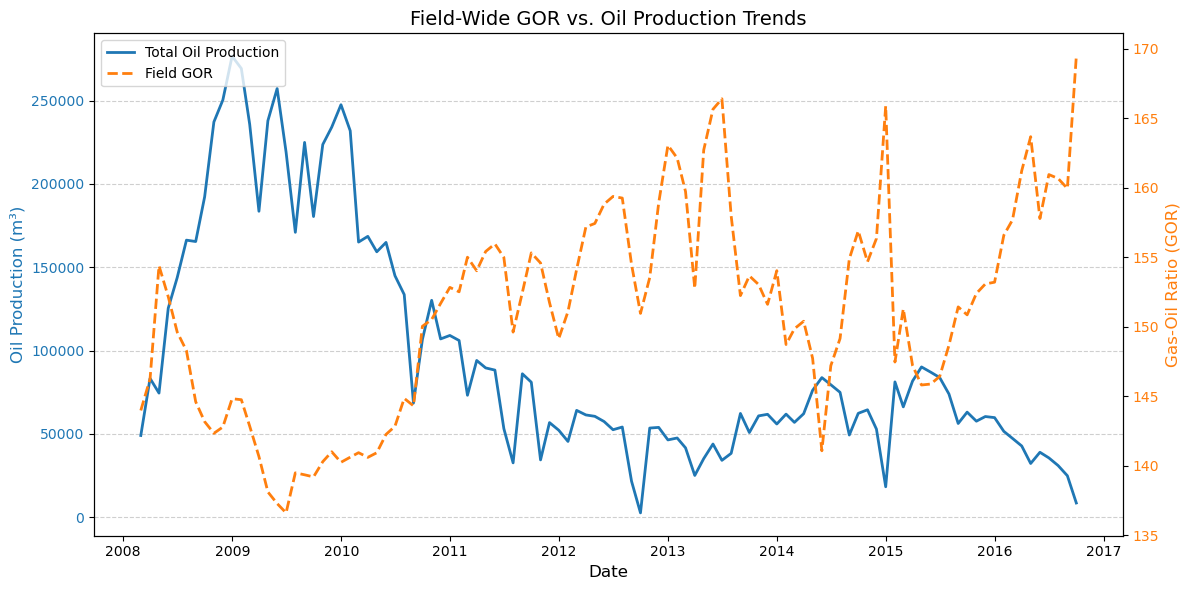

In [35]:
# Compute total monthly oil production and gas production
field_monthly = (
    daily_production_df.groupby(pd.Grouper(key="DATEPRD", freq="ME"))
    [["BORE_OIL_VOL", "BORE_GAS_VOL"]].sum()
)

# Compute Gas-Oil Ratio (GOR)
field_monthly["GOR"] = field_monthly["BORE_GAS_VOL"] / field_monthly["BORE_OIL_VOL"]
field_monthly = field_monthly.dropna()

# Set up figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Oil Production (Primary Y-Axis)
ax1.plot(
    field_monthly.index, field_monthly["BORE_OIL_VOL"], 
    color="tab:blue", linewidth=2, label="Total Oil Production"
)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Oil Production (m³)", fontsize=12, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Overlay GOR (Secondary Y-Axis)
ax2 = ax1.twinx()
ax2.plot(
    field_monthly.index, field_monthly["GOR"], 
    linestyle="--", color="tab:orange", linewidth=2, label="Field GOR"
)
ax2.set_ylabel("Gas-Oil Ratio (GOR)", fontsize=12, color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Title & Legends
plt.title("Field-Wide GOR vs. Oil Production Trends", fontsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.6)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Format X-axis with Year Labels
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [36]:
# 14-- WELL SPECIFIC GOR TRENDS

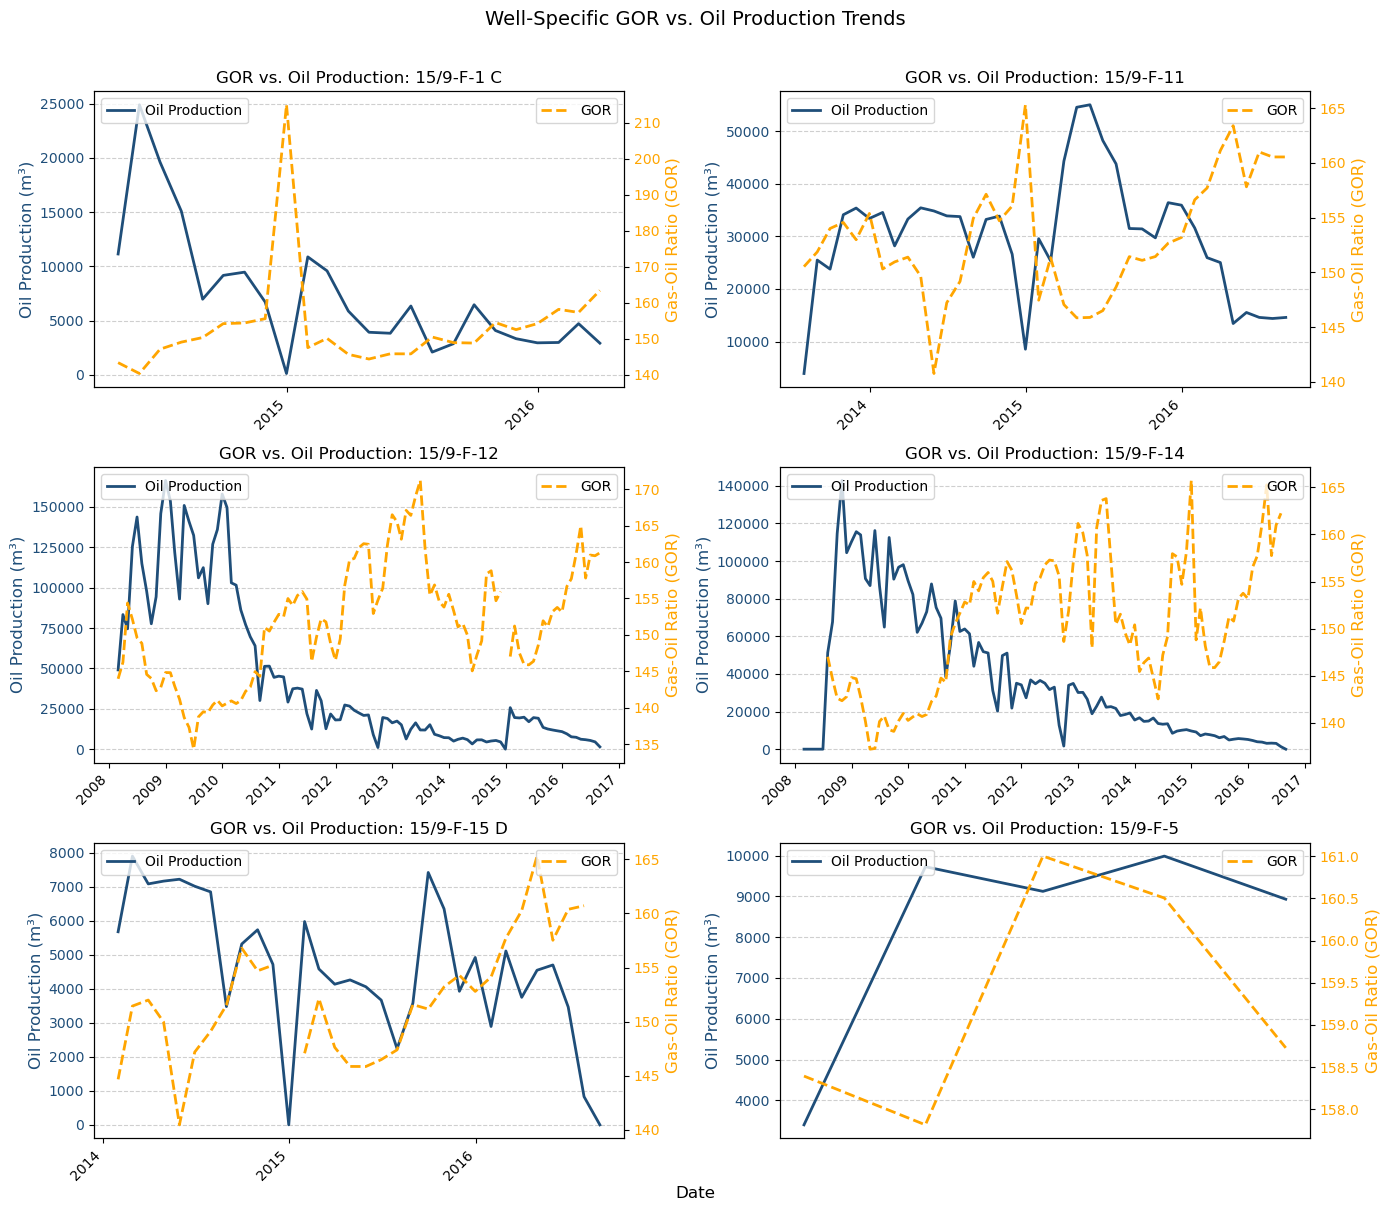

In [37]:
producer_wells = [well for well in daily_production_df["NPD_WELL_BORE_NAME"].unique() if well != "15/9-F-4"]

oil_color = "#1f4e79" 
gor_color = "orange"

cols = 2
rows = -(-len(producer_wells) // cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), sharex=False)
axes = axes.flatten()

# Loop through each well and plot GOR trends
for i, well in enumerate(producer_wells):
    ax1 = axes[i]

    # Extract well data
    well_data = daily_production_df[daily_production_df["NPD_WELL_BORE_NAME"] == well].copy()
    
    # Convert to numeric and drop NaNs
    well_data["BORE_OIL_VOL"] = pd.to_numeric(well_data["BORE_OIL_VOL"], errors="coerce")
    well_data["BORE_GAS_VOL"] = pd.to_numeric(well_data["BORE_GAS_VOL"], errors="coerce")
    well_data = well_data.dropna(subset=["BORE_OIL_VOL", "BORE_GAS_VOL", "DATEPRD"])

    production_start, production_end = well_data["DATEPRD"].min(), well_data["DATEPRD"].max()

    # Resample to Monthly
    well_monthly = (
        well_data.set_index("DATEPRD")
        .resample("ME")[["BORE_OIL_VOL", "BORE_GAS_VOL"]]
        .sum()
        .loc[production_start:production_end]
        .dropna()
    )

    # Compute GOR
    well_monthly["GOR"] = well_monthly["BORE_GAS_VOL"] / well_monthly["BORE_OIL_VOL"]

    # Plot Oil Production (Primary Y-Axis)
    ax1.plot(
        well_monthly.index, well_monthly["BORE_OIL_VOL"],
        color=oil_color, linewidth=2, label="Oil Production"
    )
    ax1.set_ylabel("Oil Production (m³)", fontsize=12, color=oil_color)
    ax1.tick_params(axis="y", labelcolor=oil_color)
    ax1.grid(axis="y", linestyle="--", alpha=0.6)

    # Overlay GOR (Secondary Y-Axis)
    ax2 = ax1.twinx()
    ax2.plot(
        well_monthly.index, well_monthly["GOR"],
        linestyle="--", color=gor_color, linewidth=2, label="GOR"
    )
    ax2.set_ylabel("Gas-Oil Ratio (GOR)", fontsize=12, color=gor_color)
    ax2.tick_params(axis="y", labelcolor=gor_color)

    # Title & Legends
    ax1.set_title(f"GOR vs. Oil Production: {well}", fontsize=12)
    ax1.legend(loc="upper left", fontsize=10)
    ax2.legend(loc="upper right", fontsize=10)

    # Format X-axis with Year Labels
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Formatting
fig.suptitle("Well-Specific GOR vs. Oil Production Trends", fontsize=14, y=1.02)
fig.text(0.5, 0.03, "Date", ha="center", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 1.01])
plt.show()

In [38]:
# 15-- WELL OPERATIONAL PERFORMANCE ANALYSIS

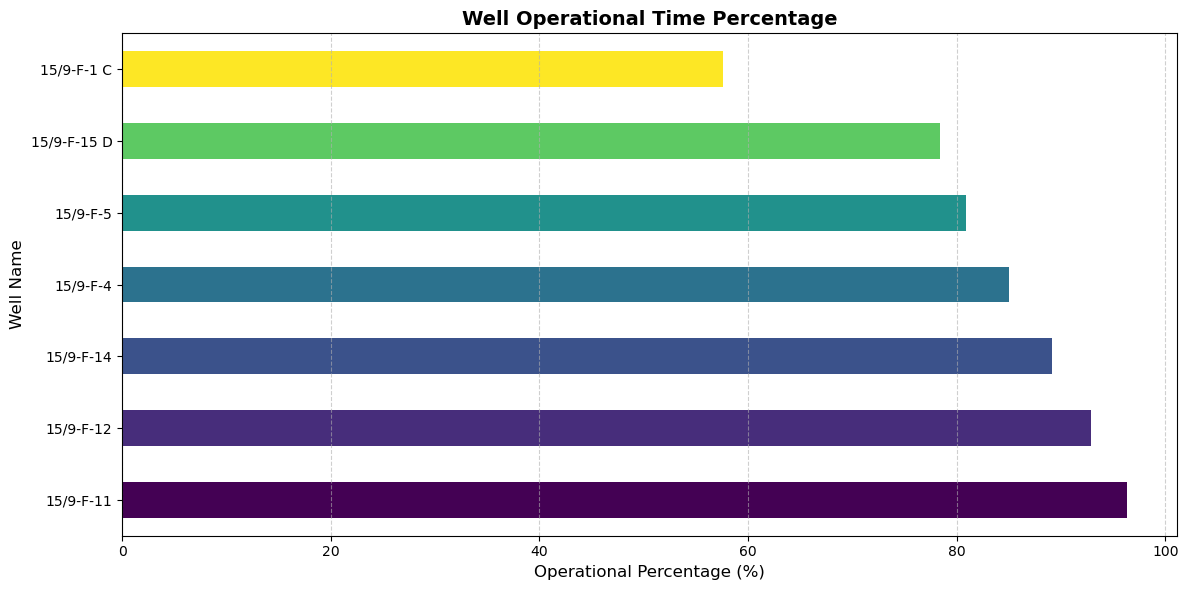

Total Recorded Days  Days Operational  Oil Production (Sm³)  \
Well Name                                                                  
15/9-F-11                   1165              1122            1147849.10   
15/9-F-12                   3056              2837            4579609.55   
15/9-F-14                   3056              2723            3942233.39   
15/9-F-4                    3327              2828                  0.00   
15/9-F-5                    3306              2674              41160.68   
15/9-F-15 D                  978               767             148518.56   
15/9-F-1 C                   746               430             177709.33   

             Gas Production (Million Sm³)  Water Production (Sm³)  \
Well Name                                                           
15/9-F-11                      174.310521              1090806.27   
15/9-F-12                      667.542278              6833320.37   
15/9-F-14                      578.009542              7121249.74   
15/9-F-4                         0.000000                    0.00   
15/9-F-5                         6.561826                13533.18   
15/9-F-15 D                     22.505351                52366.40   
15/9-F-1 C                      26.440919               207302.39   

             Operational Time (%)  
Well Name                          
15/9-F-11               96.309013  
15/9-F-12               92.833770  
15/9-F-14               89.103403  
15/9-F-4                85.001503  
15/9-F-5                80.883243  
15/9-F-15 D             78.425358  
15/9-F-1 C              57.640751

In [103]:
# Convert date column to datetime format
daily_production_df["DATEPRD"] = pd.to_datetime(daily_production_df["DATEPRD"])

# Identify production wells
daily_production_df["is_operational"] = (daily_production_df["ON_STREAM_HRS"] > 0) & (
    (daily_production_df["BORE_OIL_VOL"] > 0) | 
    (daily_production_df["BORE_GAS_VOL"] > 0) | 
    (daily_production_df["BORE_WAT_VOL"] > 0)
)

# Identify injector wells
daily_production_df["is_injector_operational"] = (daily_production_df["ON_STREAM_HRS"] > 0) & (
    daily_production_df["BORE_WI_VOL"] > 0
)

# Apply operational criteria based on well type
daily_production_df["final_operational"] = daily_production_df["is_operational"] | daily_production_df["is_injector_operational"]

# Group by well and calculate operational statistics
well_operational_analysis = daily_production_df.groupby("NPD_WELL_BORE_NAME").agg(
    Total_Days=("DATEPRD", "count"),  
    Operational_Days=("final_operational", "sum"),  
    Cumulative_Oil=("BORE_OIL_VOL", "sum"),  
    Cumulative_Gas=("BORE_GAS_VOL", "sum"),  
    Cumulative_Water=("BORE_WAT_VOL", "sum"),  
)

# Convert gas to Million Sm³ for better readability
well_operational_analysis["Cumulative_Gas"] = well_operational_analysis["Cumulative_Gas"] / 1e6

# Calculate percentage of operational time
well_operational_analysis["Operational_Percentage"] = (
    well_operational_analysis["Operational_Days"] / well_operational_analysis["Total_Days"]
) * 100

well_operational_analysis.rename(columns={
    "Cumulative_Oil": "Oil Production (Sm³)",
    "Cumulative_Gas": "Gas Production (Million Sm³)",
    "Cumulative_Water": "Water Production (Sm³)",
    "Operational_Percentage": "Operational Time (%)",
    "Operational_Days": "Days Operational",
    "Total_Days": "Total Recorded Days",
}, inplace=True)
well_operational_analysis.index.name = "Well Name"

# Sort by operational time
well_operational_analysis = well_operational_analysis.sort_values("Operational Time (%)", ascending=False)

colors_list = ["#440154", "#472D7B", "#3B528B", "#2C728E", "#21918C", "#5DC963", "#FDE725"]
colors_list = colors_list[:len(well_operational_analysis)]

# Plot Operational Time Percentage
fig, ax = plt.subplots(figsize=(12, 6))

well_operational_analysis["Operational Time (%)"].plot(
    kind="barh", ax=ax, color=colors_list, legend=False
)

ax.set_title("Well Operational Time Percentage", fontsize=14, fontweight="bold")
ax.set_xlabel("Operational Percentage (%)", fontsize=12)
ax.set_ylabel("Well Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# Display table
display(well_operational_analysis)
